In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/content/train_LZdllcl.csv')

In [3]:
test = pd.read_csv('/content/test_2umaH9m.csv')

In [4]:
sampling = pd.read_csv('/content/sample_submission_M0L0uXE.csv')

In [5]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [8]:
sampling.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [9]:
train.shape

(54808, 14)

In [10]:
test.shape

(23490, 13)

In [11]:
sampling.shape

(23490, 2)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [14]:
train.dtypes

,0
employee_id,int64
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64


In [15]:
test.dtypes

,0
employee_id,int64
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64


In [16]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [17]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [19]:
train.nunique()

,0
employee_id,54808
department,9
region,34
education,3
gender,2
recruitment_channel,3
no_of_trainings,10
age,41
previous_year_rating,5
length_of_service,35


In [20]:
test.nunique()

,0
employee_id,23490
department,9
region,34
education,3
gender,2
recruitment_channel,3
no_of_trainings,9
age,41
previous_year_rating,5
length_of_service,34


In [21]:
sampling.nunique()

,0
employee_id,23490
is_promoted,1


In [22]:
train['employee_id'].nunique()

54808

In [23]:
test['employee_id'].nunique()

23490

In [24]:
 # dropping it as number of unique values are same as number of rows

In [25]:
train_backup = train.copy()
test_backup = test.copy()

In [26]:
train=train.drop('employee_id',axis=1)

In [27]:
test.drop('employee_id', axis=1, inplace=True)

In [28]:
train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [29]:
numerical_columns=train.select_dtypes("number").columns
numerical_columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [30]:
numerical_columns1=test.select_dtypes("number").columns
numerical_columns1

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

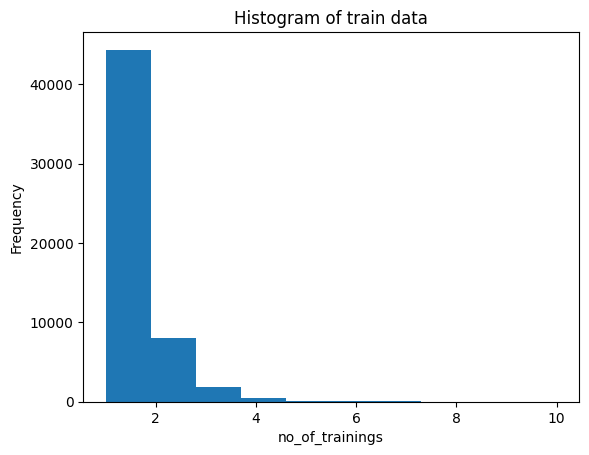

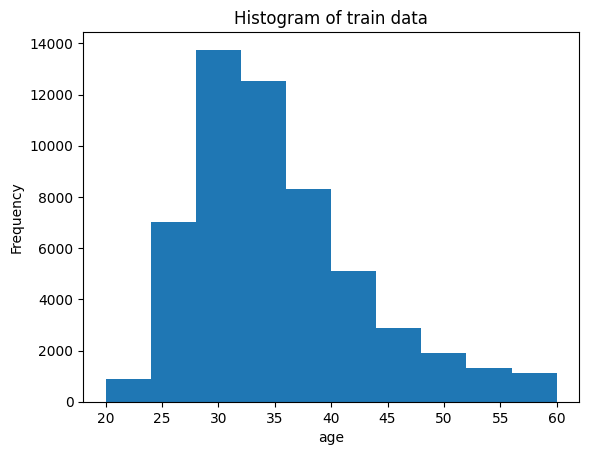

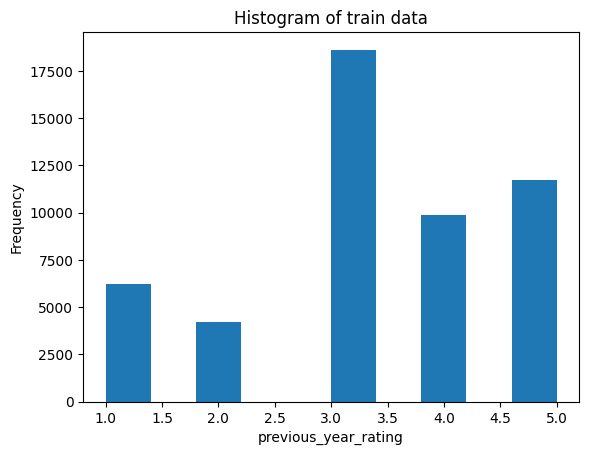

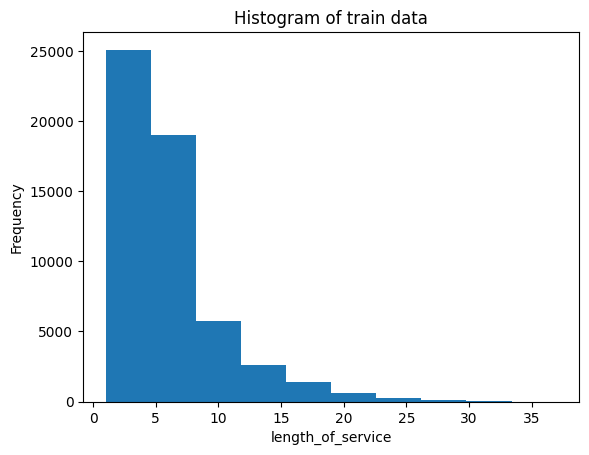

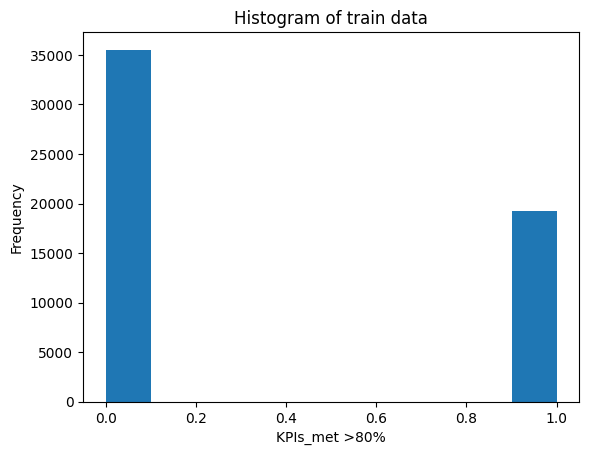

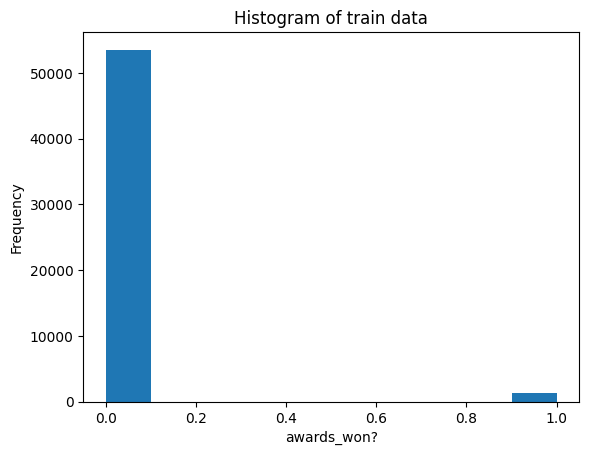

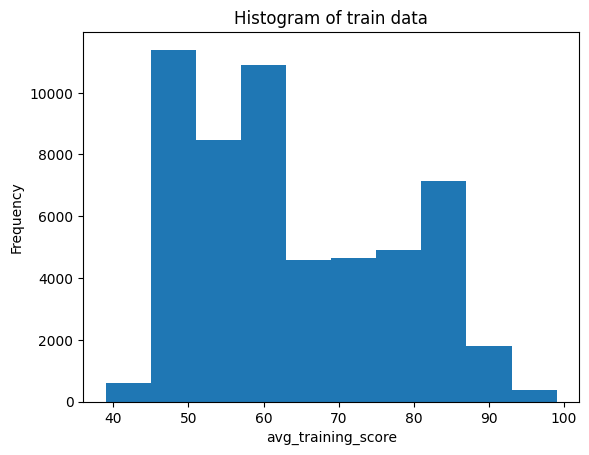

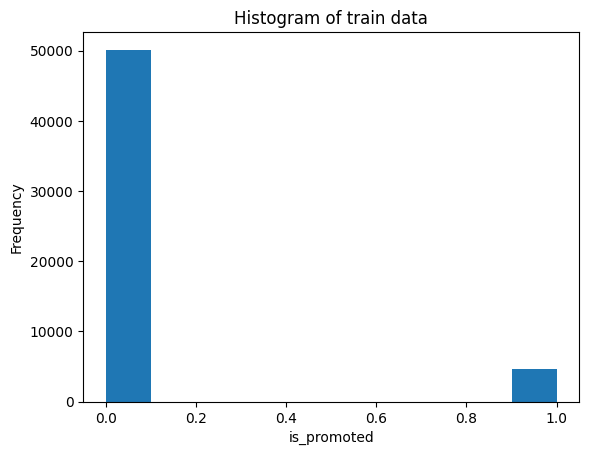

In [31]:
for column in numerical_columns:
  plt.hist(train[column],bins=10)
  plt.title(f'Histogram of train data')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

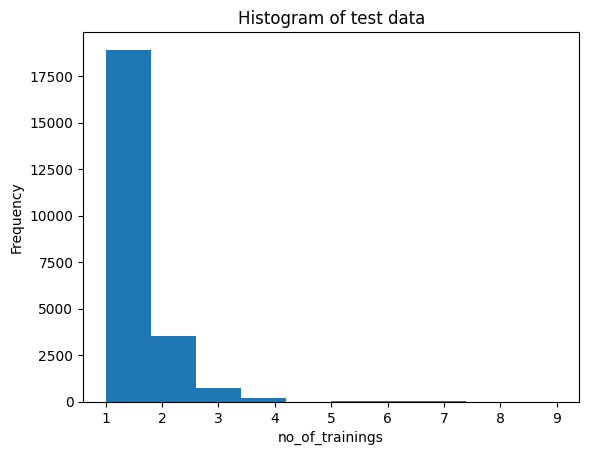

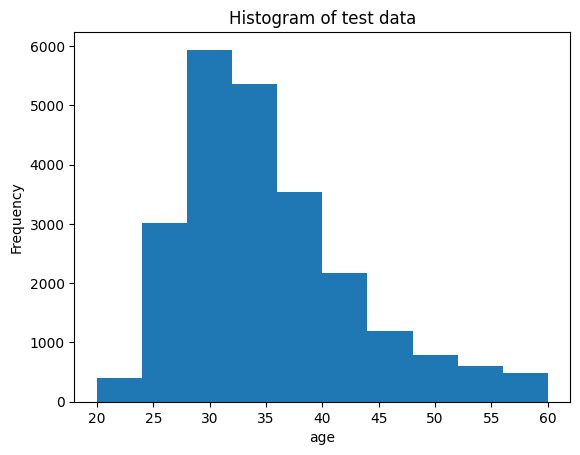

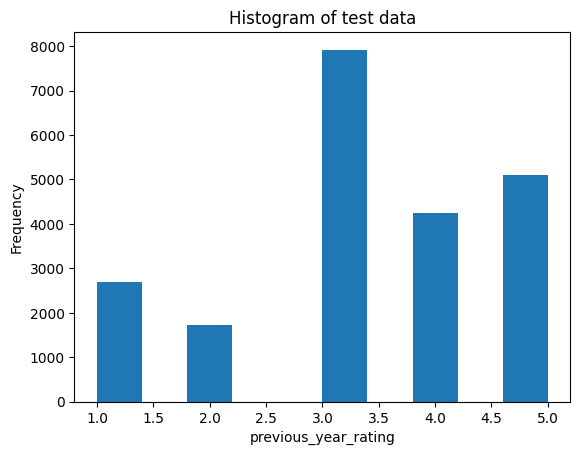

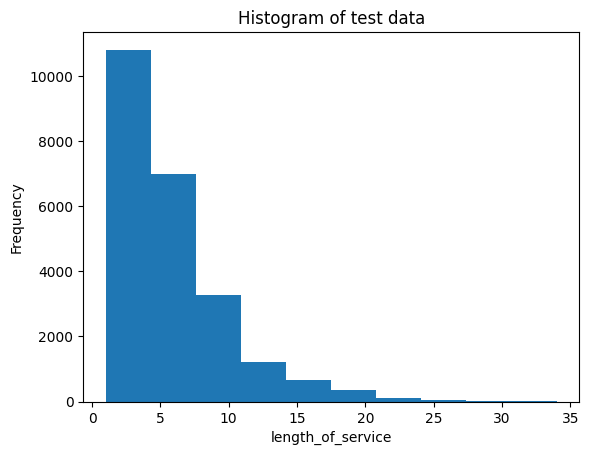

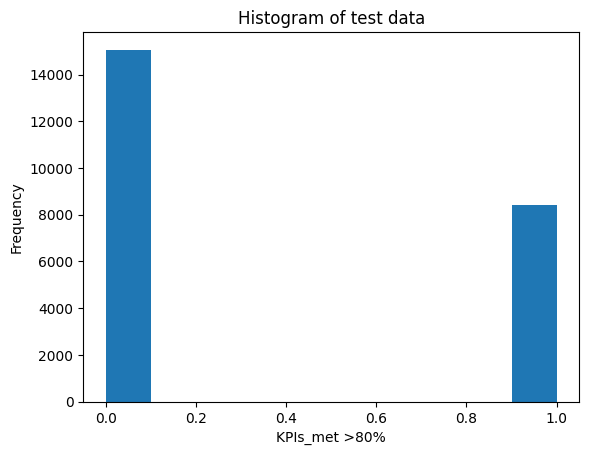

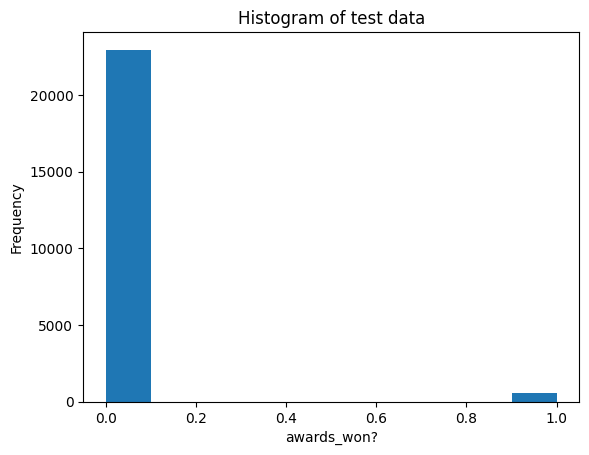

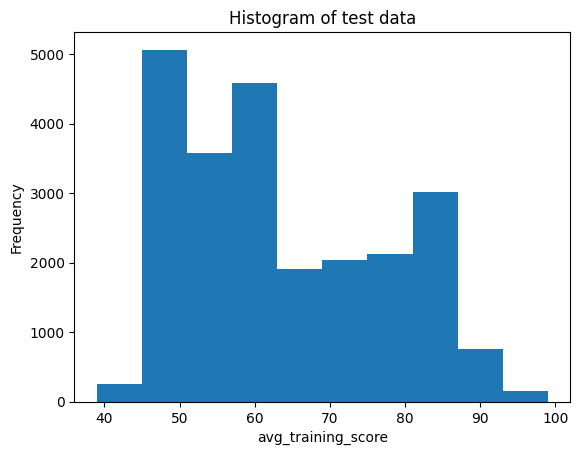

In [32]:
for column in numerical_columns1:
  plt.hist(test[column],bins=10)
  plt.title(f'Histogram of test data')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

In [33]:
categorical_columns=train.select_dtypes("object").columns
categorical_columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [34]:
categorical_columns1=test.select_dtypes("object").columns
categorical_columns1

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

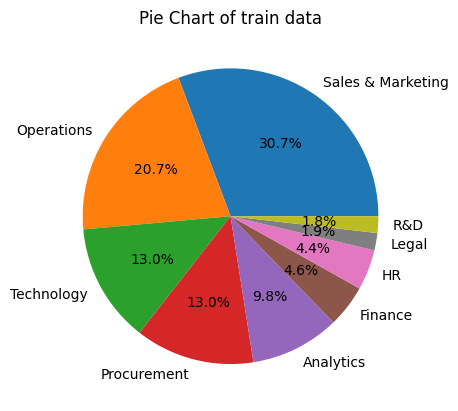

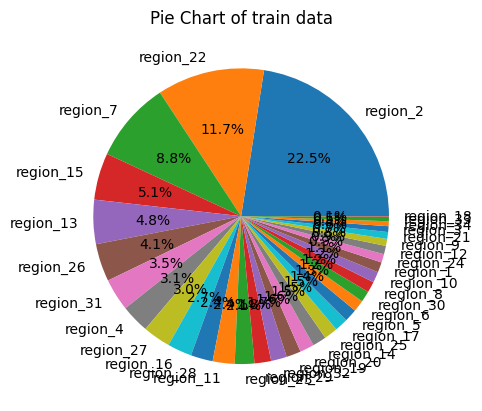

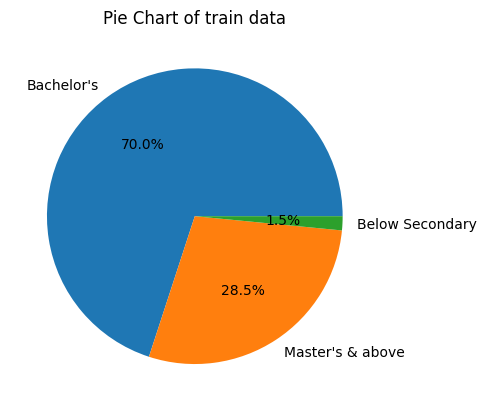

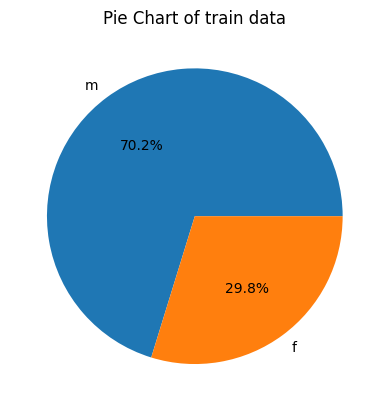

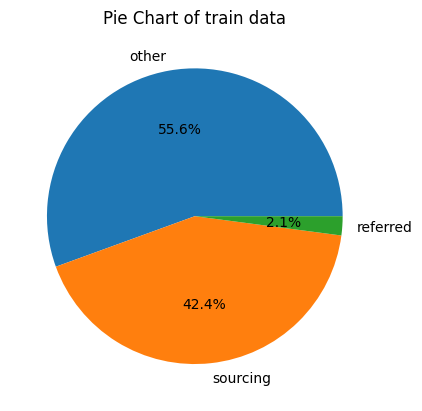

In [35]:
for column in categorical_columns:
  cat_counts = train[column].value_counts()
  plt.pie(cat_counts.values, labels=cat_counts.index, autopct='%1.1f%%')
  plt.title('Pie Chart of train data')
  plt.show()

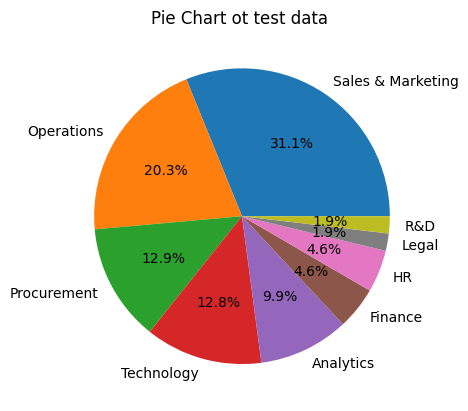

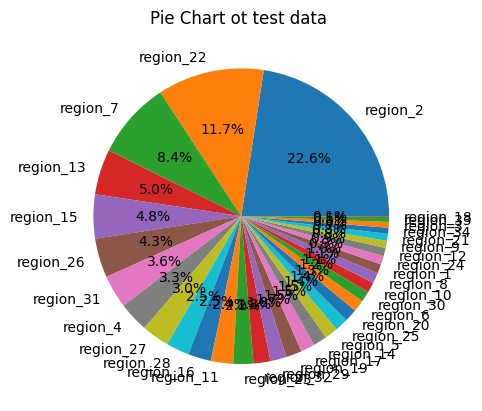

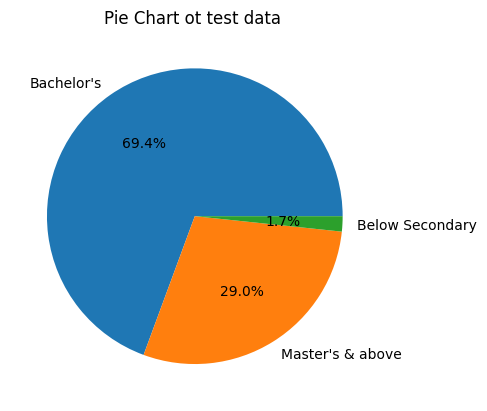

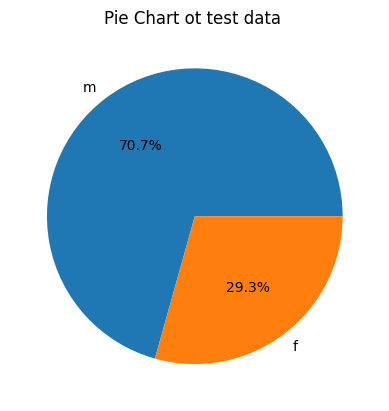

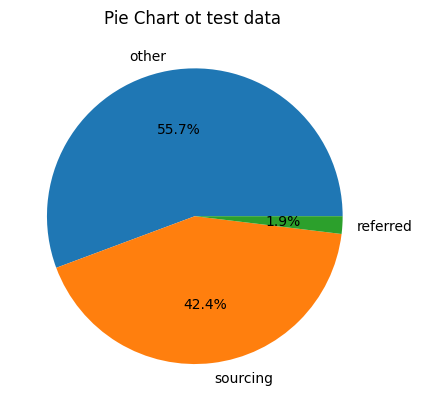

In [36]:
for column in categorical_columns1:
  cat_counts = test[column].value_counts()
  plt.pie(cat_counts.values, labels=cat_counts.index, autopct='%1.1f%%')
  plt.title('Pie Chart ot test data ')
  plt.show()

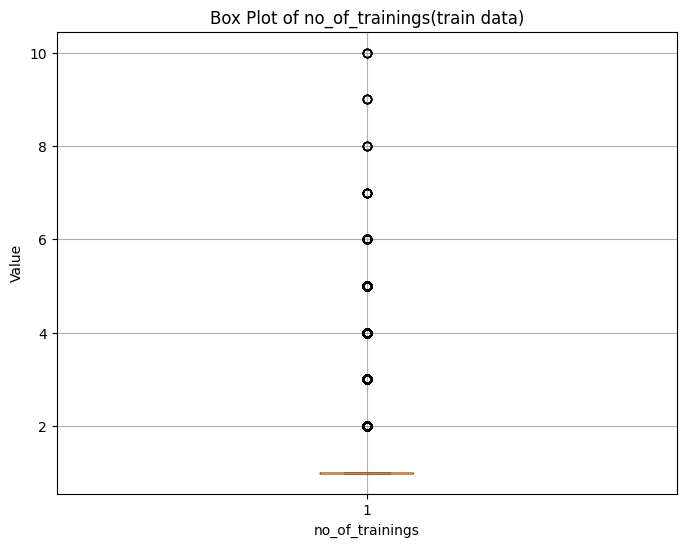

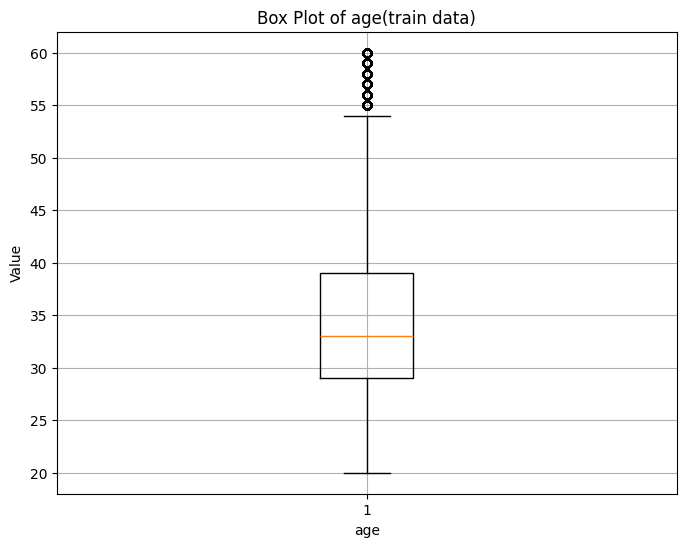

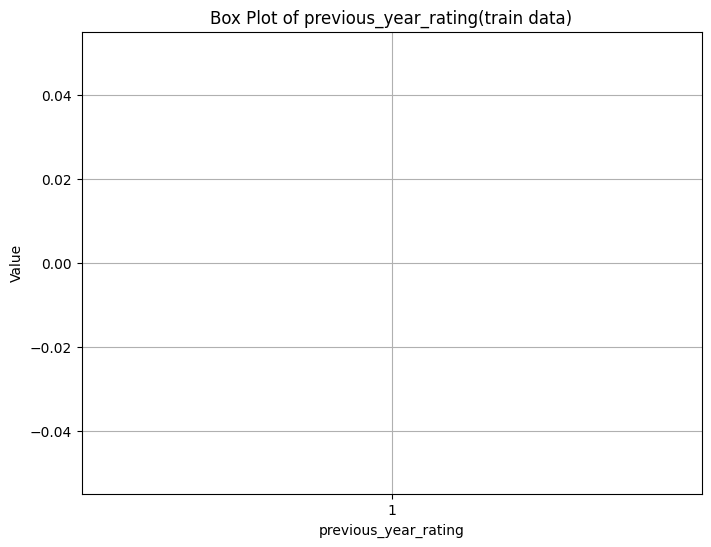

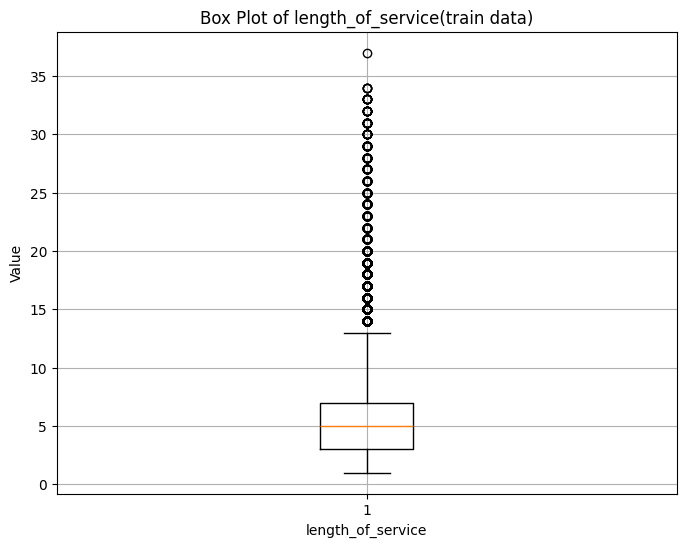

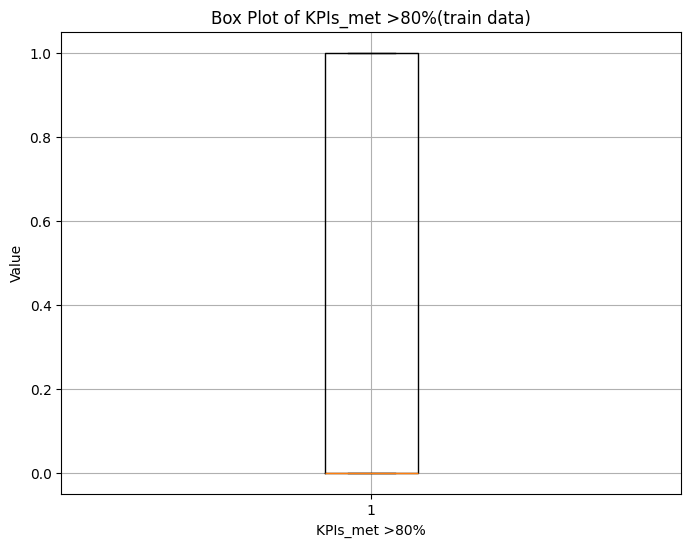

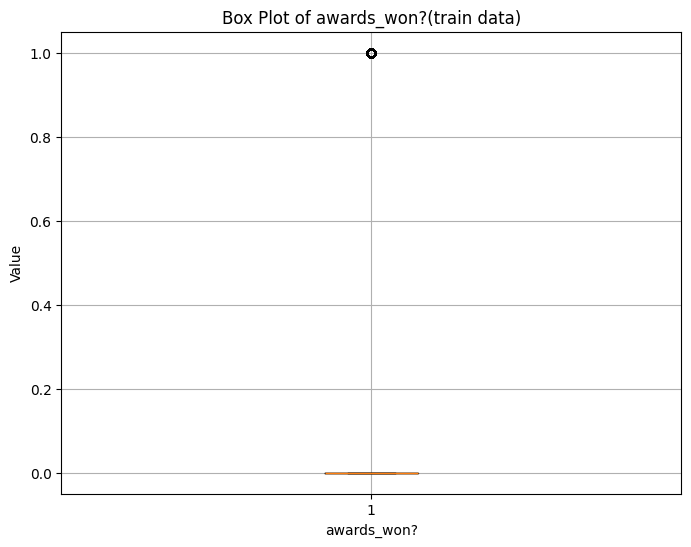

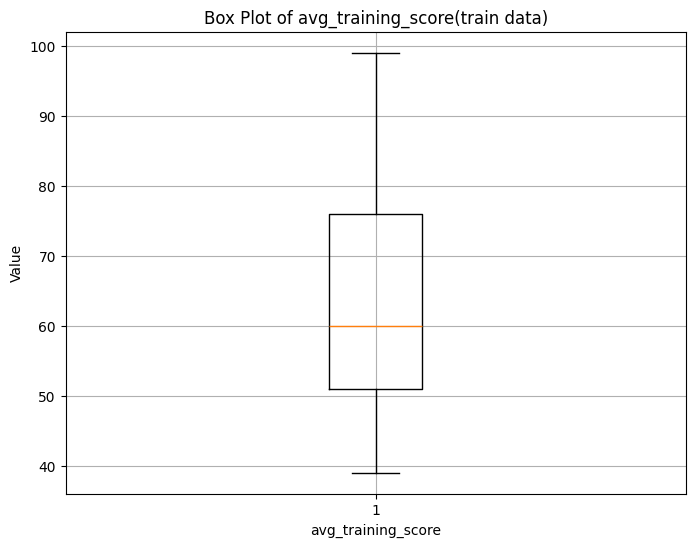

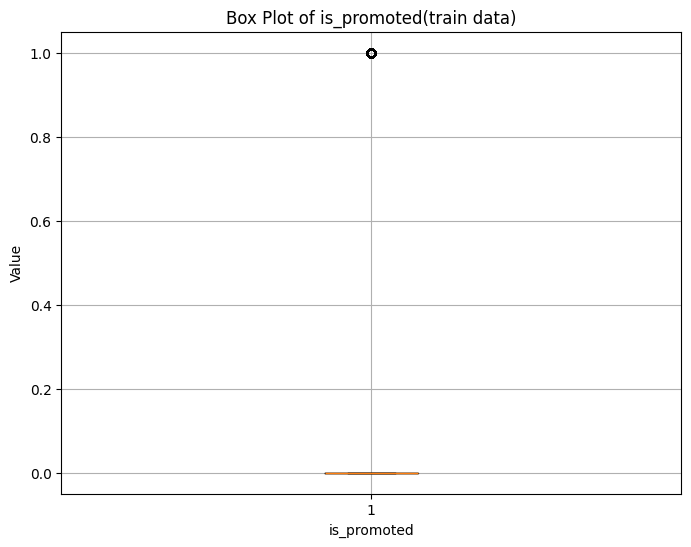

In [37]:
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(train[column])
    plt.title(f'Box Plot of {column}(train data)')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

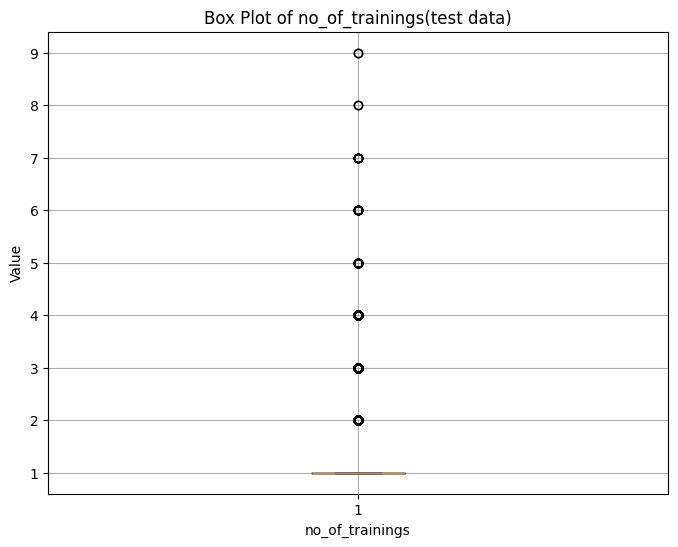

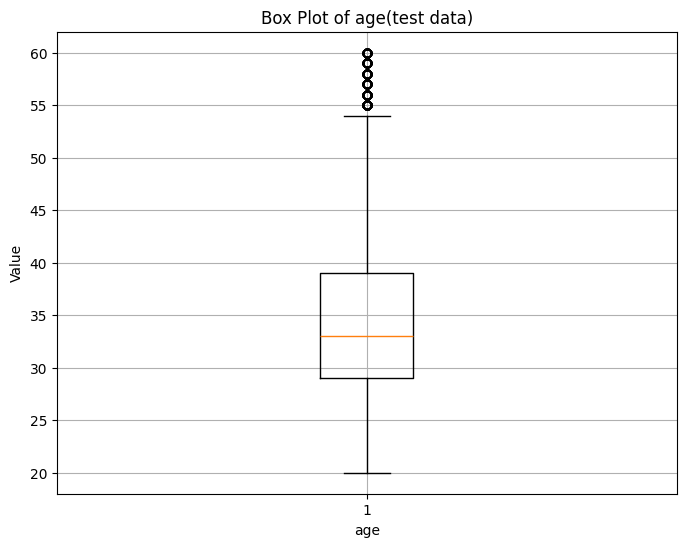

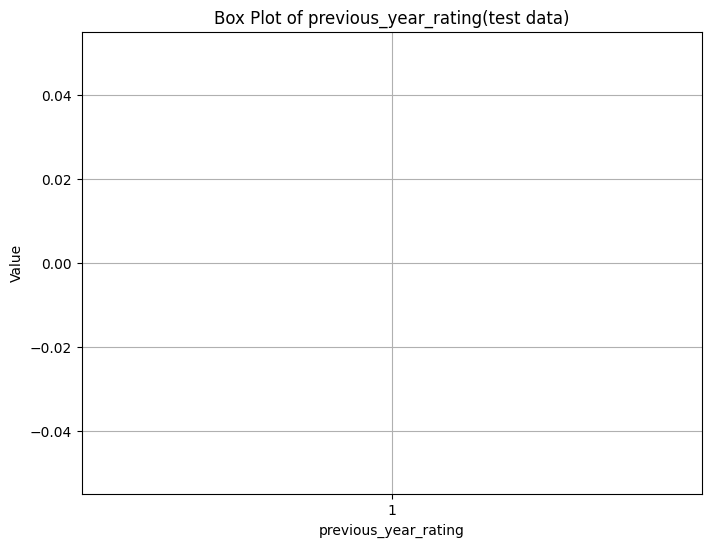

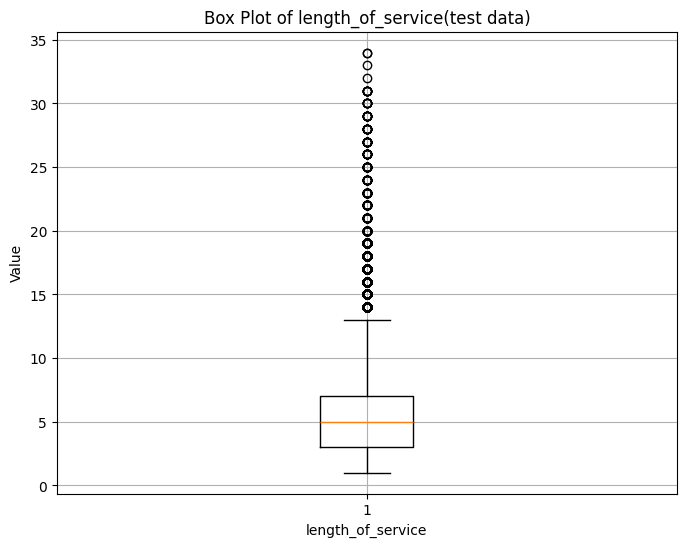

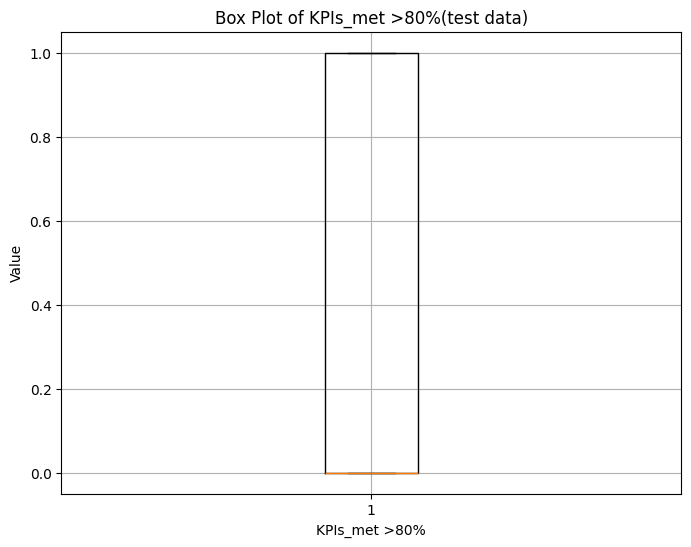

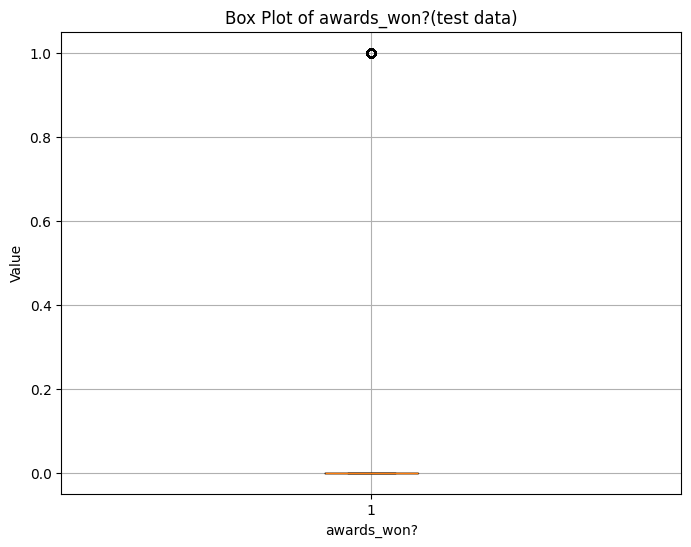

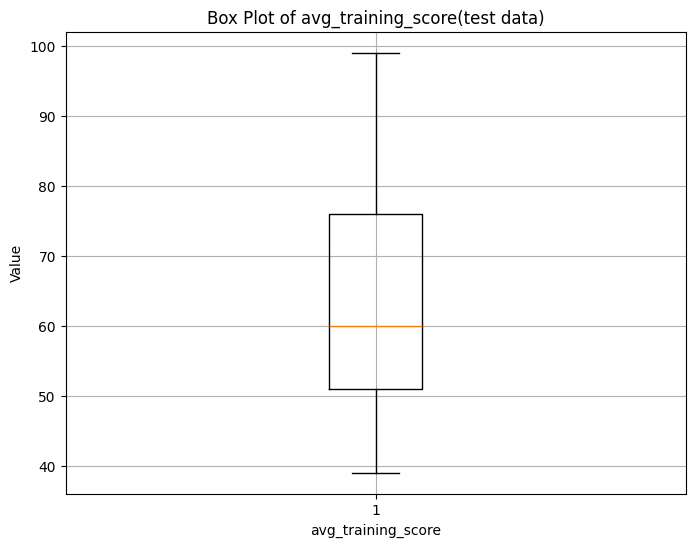

In [38]:
for column in numerical_columns1:
    plt.figure(figsize=(8, 6))
    plt.boxplot(test[column])
    plt.title(f'Box Plot of {column}(test data)')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

**Bivariate Analysis**

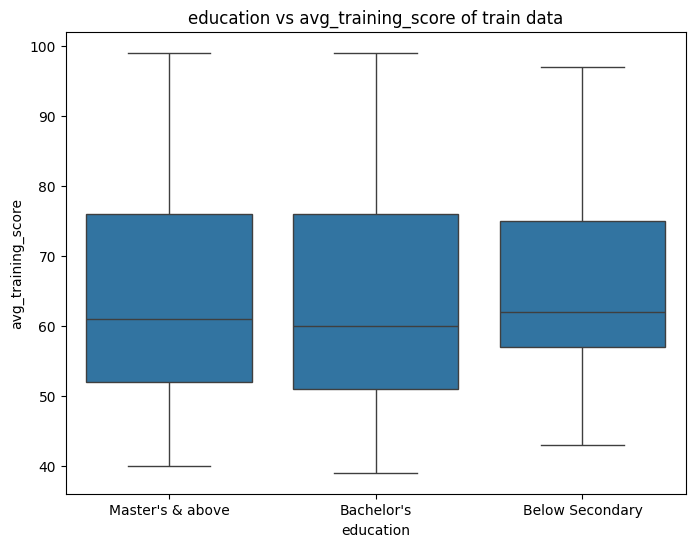

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='education', y='avg_training_score', data=train)
plt.title('education vs avg_training_score of train data')
plt.show()

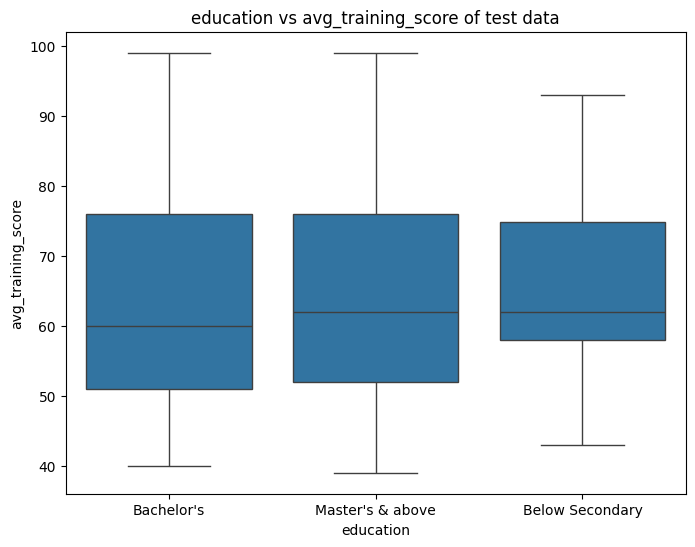

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='education', y='avg_training_score', data=test)
plt.title('education vs avg_training_score of test data')
plt.show()

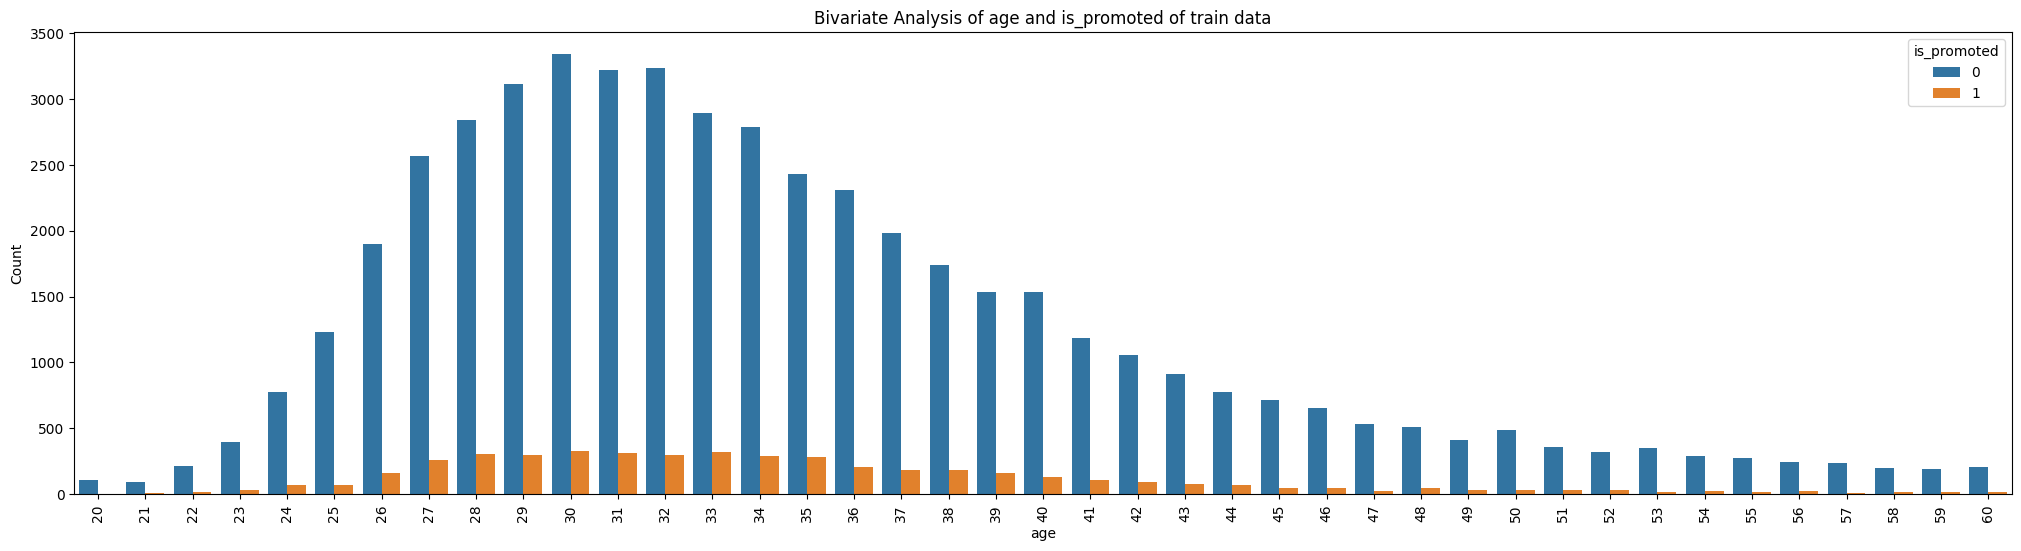

In [41]:
plt.figure(figsize=(25, 6))
sns.countplot(data=train, x='age', hue='is_promoted')
plt.title('Bivariate Analysis of age and is_promoted of train data')
plt.xlabel('age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

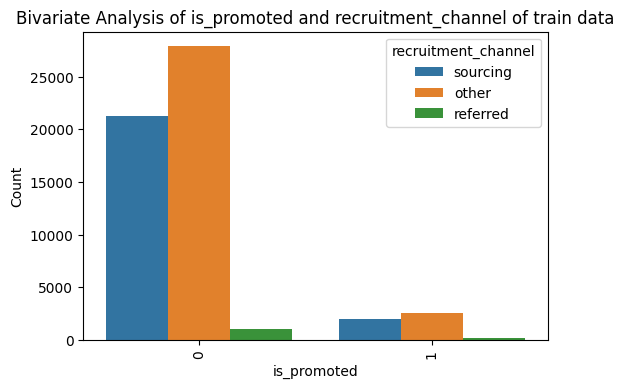

In [42]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='is_promoted', hue='recruitment_channel')
plt.title('Bivariate Analysis of is_promoted and recruitment_channel of train data')
plt.xlabel('is_promoted')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

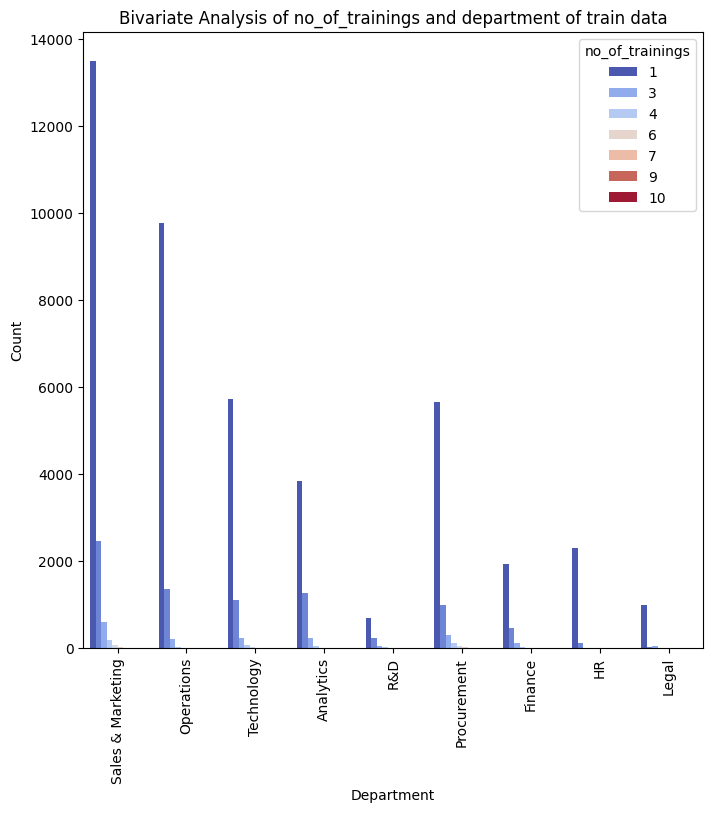

In [43]:
plt.figure(figsize=(8, 8))
sns.countplot(data=train, x='department', hue='no_of_trainings', palette='coolwarm')
plt.title('Bivariate Analysis of no_of_trainings and department of train data')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

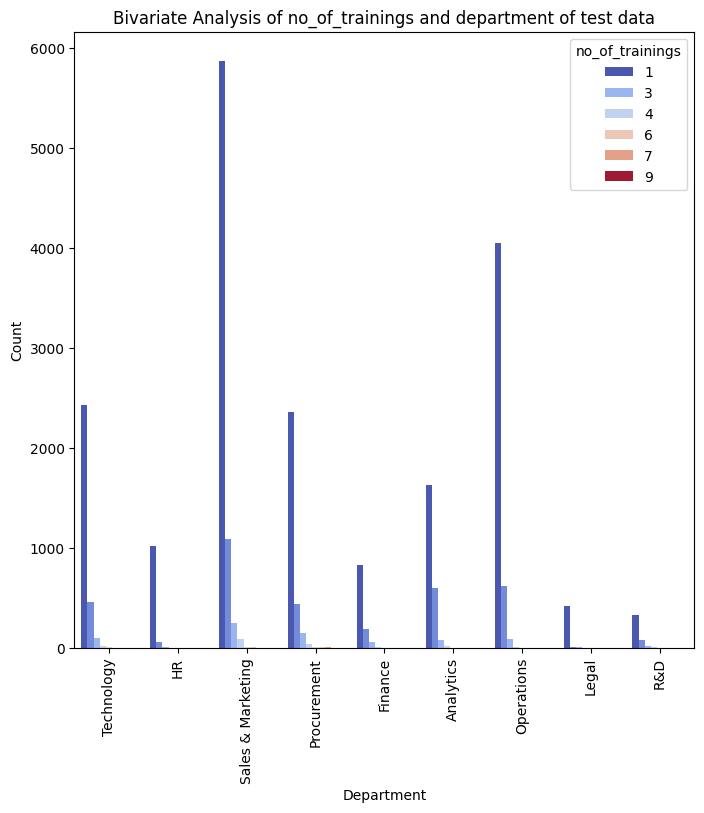

In [44]:
plt.figure(figsize=(8, 8))
sns.countplot(data=test, x='department', hue='no_of_trainings', palette='coolwarm')
plt.title('Bivariate Analysis of no_of_trainings and department of test data')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**Pre Processing**

In [45]:
#Handling missing values

In [46]:
train.isna().sum()

,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0
KPIs_met >80%,0


In [47]:
test.isna().sum()

,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0
KPIs_met >80%,0


In [48]:
train['education'].mode()

,education
0,Bachelor's


In [49]:
test['education'].mode()

,education
0,Bachelor's


In [50]:
#fill categorical column with mode

In [51]:
train['education']  = train['education'].fillna(train['education'].mode().iloc[0])

In [52]:
test['education']  = test['education'].fillna(test['education'].mode().iloc[0])

In [53]:
#fill numerical column with median

In [54]:
train['previous_year_rating'].median()

3.0

In [55]:
test['previous_year_rating'].median()

3.0

In [56]:
train['previous_year_rating']=train['previous_year_rating'].fillna(train['previous_year_rating'].median())

In [57]:
test['previous_year_rating']=test['previous_year_rating'].fillna(test['previous_year_rating'].median())

In [58]:
train.isna().sum()

,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0
KPIs_met >80%,0


In [59]:
test.isna().sum()

,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0
KPIs_met >80%,0


In [60]:
# Outliers

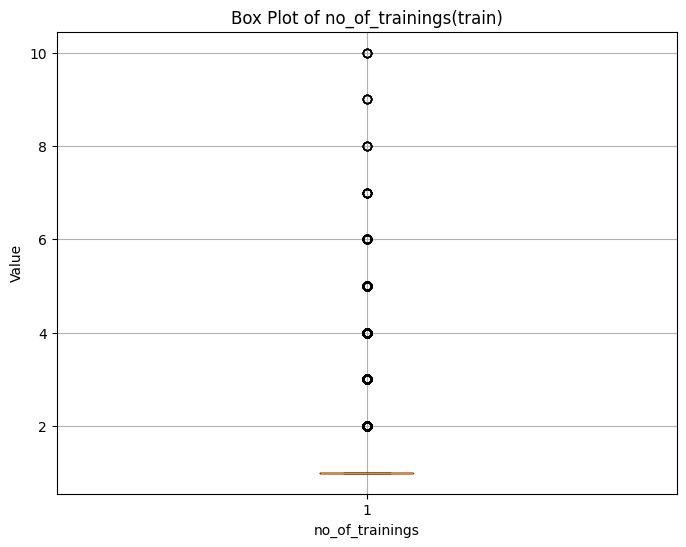

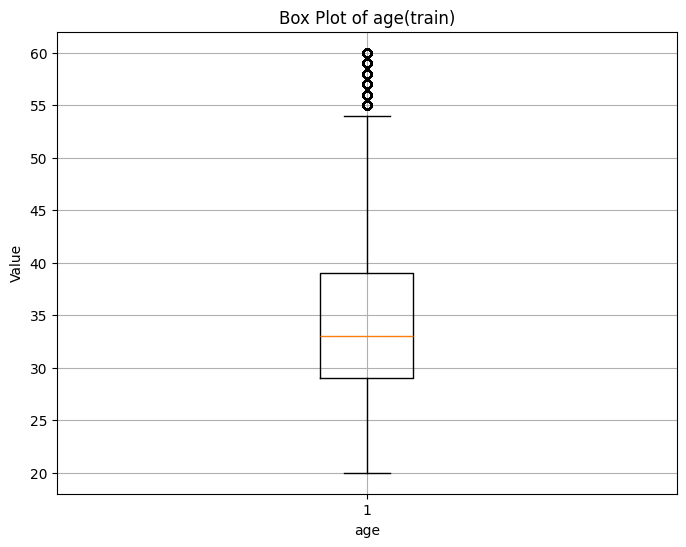

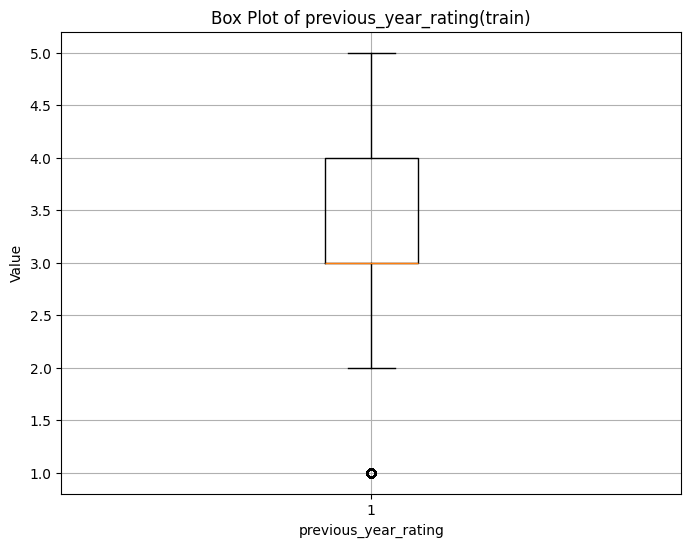

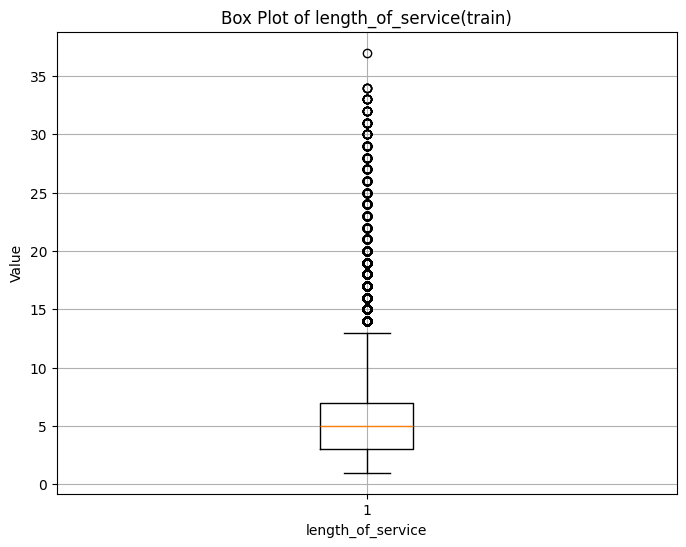

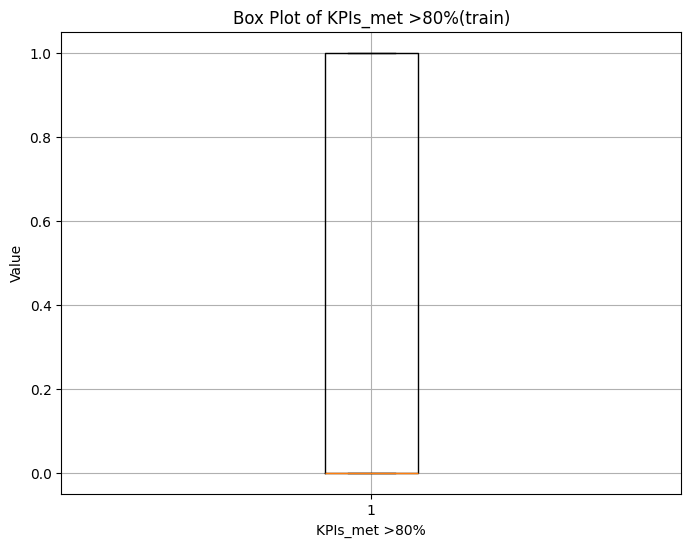

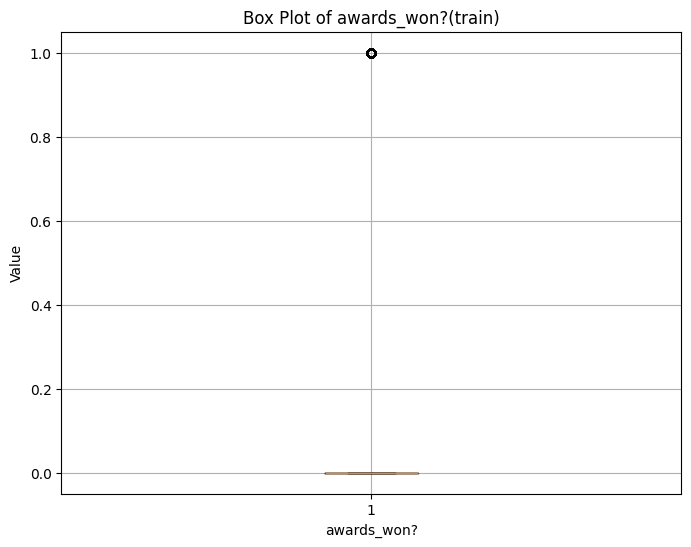

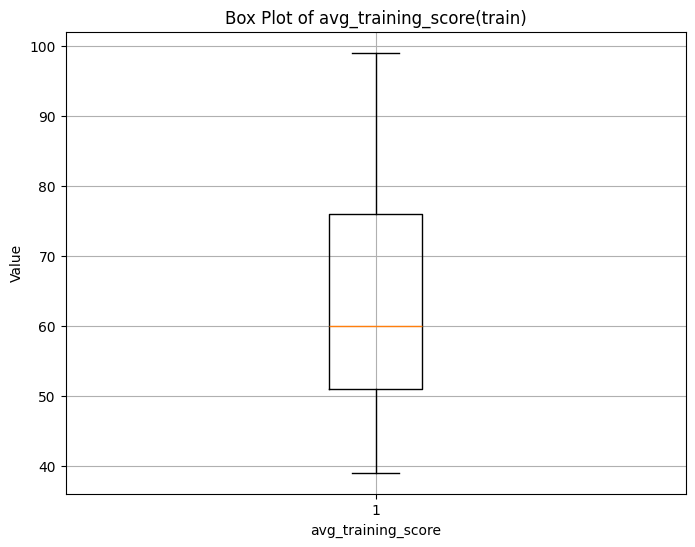

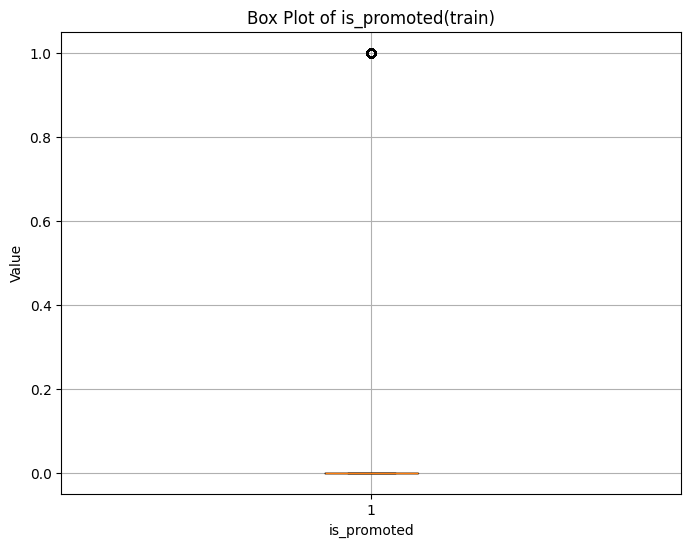

In [61]:
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(train[column])
    plt.title(f'Box Plot of {column}(train)')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

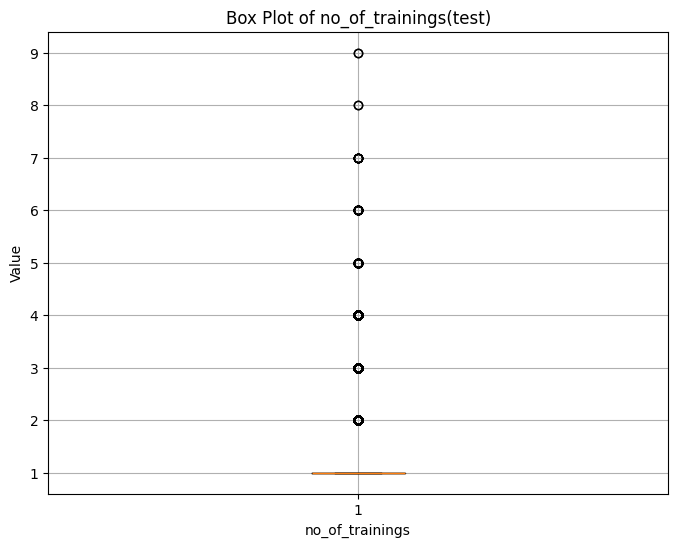

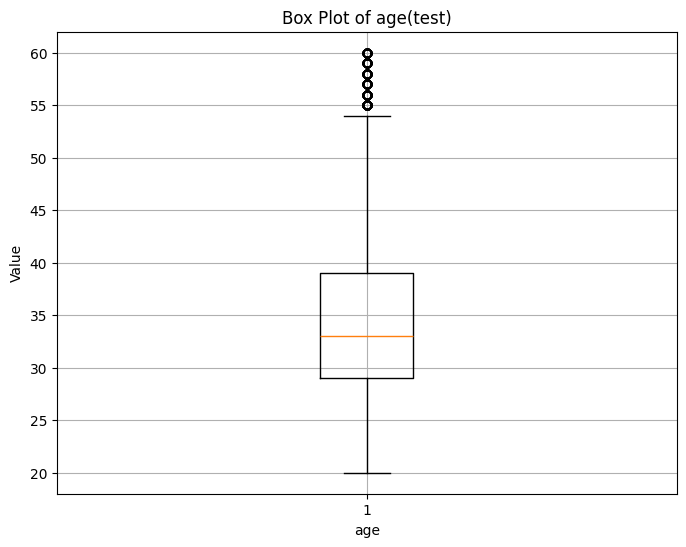

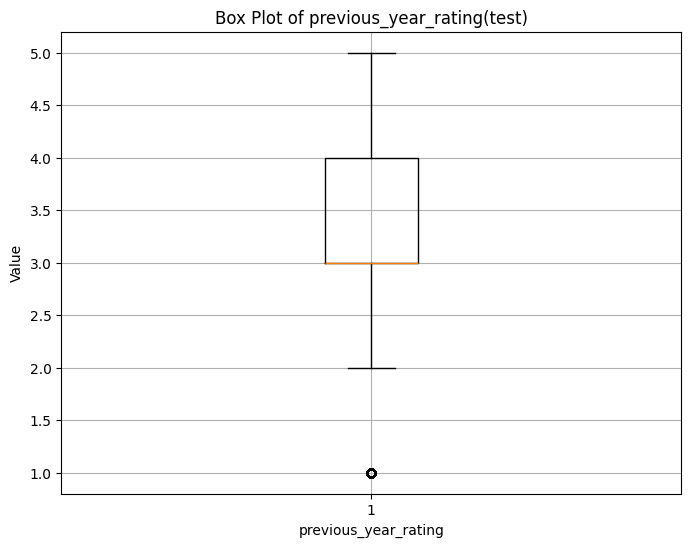

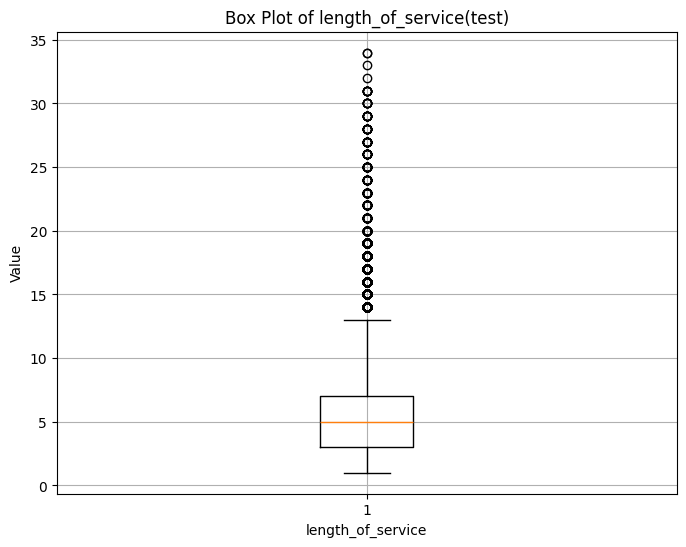

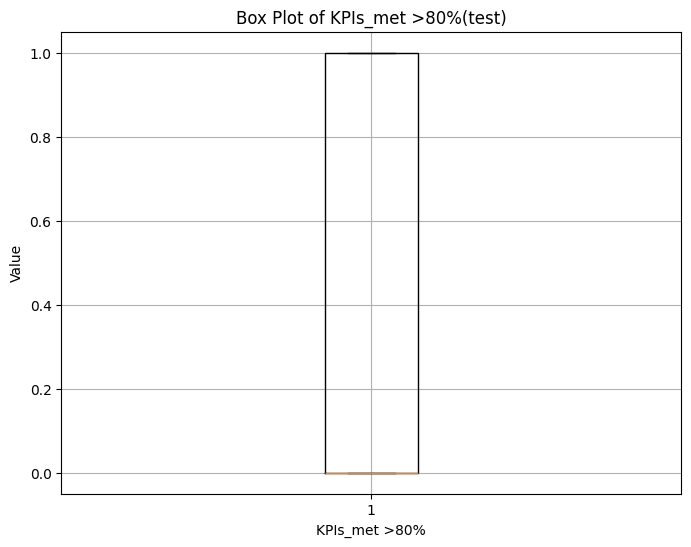

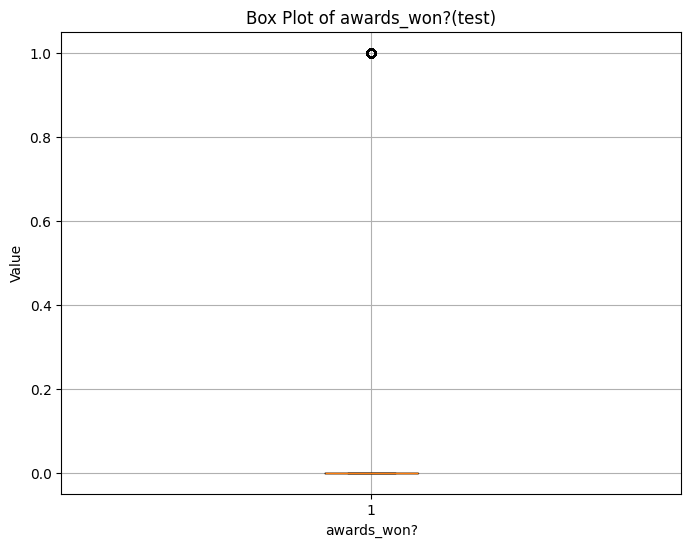

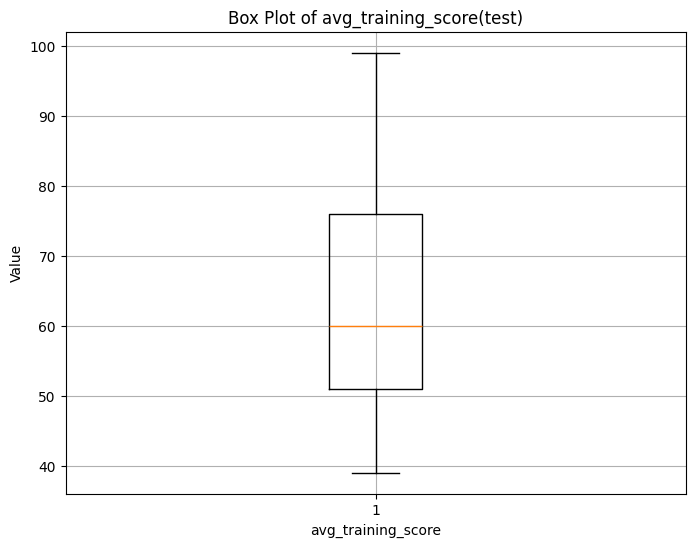

In [62]:
for column in numerical_columns1:
    plt.figure(figsize=(8, 6))
    plt.boxplot(test[column])
    plt.title(f'Box Plot of {column}(test)')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()


In [63]:
skew_values = train[numerical_columns].skew().sort_values(ascending=False)
print("Skewness of numeric features train:\n", skew_values)

Skewness of numeric features train:
 awards_won?             6.338914
no_of_trainings         3.445434
is_promoted             2.972339
length_of_service       1.738061
age                     1.007432
KPIs_met >80%           0.619909
avg_training_score      0.451908
previous_year_rating   -0.260858
dtype: float64


In [64]:
skew_values1 = test[numerical_columns1].skew().sort_values(ascending=False)
print("Skewness of numeric features of test data:\n", skew_values)

Skewness of numeric features of test data:
 awards_won?             6.338914
no_of_trainings         3.445434
is_promoted             2.972339
length_of_service       1.738061
age                     1.007432
KPIs_met >80%           0.619909
avg_training_score      0.451908
previous_year_rating   -0.260858
dtype: float64


In [65]:
cols_to_clean = ['awards_won?', 'no_of_trainings', 'length_of_service', 'age'] # rest have little skewness

In [66]:
outliers_indices = {}

# Loop over each column
for column in cols_to_clean:
    # Calculate Q1, Q3, and IQR based on train data
    q1 = np.percentile(train[column], 25)
    q3 = np.percentile(train[column], 75)
    iqr = q3 - q1

    # Define outlier bounds
    low_limit = q1 - 1.5 * iqr
    upr_limit = q3 + 1.5 * iqr

    # Get indices of outliers in train
    column_outliers_indices = train[(train[column] < low_limit) | (train[column] > upr_limit)].index
    outliers_indices[column] = column_outliers_indices

    # Drop outliers from train
    train = train.drop(index=column_outliers_indices)

    # Cap test data at same bounds (optional, instead of dropping rows)
    test[column] = test[column].clip(lower=low_limit, upper=upr_limit)

print("Outlier removal applied to train and test (capped)")

Outlier removal applied to train and test (capped)


In [67]:
# Check skewness after outlier treatment
train_skewness = train[numerical_columns].skew().sort_values(ascending=False)
test_skewness = test[numerical_columns1].skew().sort_values(ascending=False)

print("Skewness of numeric features - TRAIN:")
print(train_skewness)

print("\nSkewness of numeric features - TEST:")
print(test_skewness)

Skewness of numeric features - TRAIN:
is_promoted             3.076325
length_of_service       0.797965
KPIs_met >80%           0.582667
age                     0.546893
avg_training_score      0.506517
no_of_trainings         0.000000
awards_won?             0.000000
previous_year_rating   -0.280010
dtype: float64

Skewness of numeric features - TEST:
length_of_service       1.031576
age                     0.742215
KPIs_met >80%           0.588650
avg_training_score      0.458113
no_of_trainings         0.000000
awards_won?             0.000000
previous_year_rating   -0.272367
dtype: float64


In [68]:
train.dtypes

,0
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64
KPIs_met >80%,int64


In [69]:
test.dtypes

,0
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,float64
previous_year_rating,float64
length_of_service,float64
KPIs_met >80%,int64


In [70]:
#Encoding

In [71]:
#one hot encoding for columns department, education, gender, recruitment_channel

In [72]:
# Columns to one-hot encode
one_hot_cols = ['department', 'education', 'gender', 'recruitment_channel']

# Combine train and test temporarily to ensure consistent columns
train['dataset_type'] = 'train'
test['dataset_type'] = 'test'

combined = pd.concat([train, test], axis=0)

# Apply one-hot encoding
combined = pd.get_dummies(combined, columns=one_hot_cols, drop_first=True)

# Split them back
train = combined[combined['dataset_type'] == 'train'].drop('dataset_type', axis=1)
test = combined[combined['dataset_type'] == 'test'].drop('dataset_type', axis=1)
print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (39947, 22)
Test shape: (23490, 22)


In [73]:
test = test.drop(columns=['is_promoted'])

In [74]:
test.head()

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,region_26,1,24.0,3.0,1.0,1,0,77,False,False,...,False,False,False,False,True,False,False,True,False,True
1,region_4,1,31.0,3.0,5.0,0,0,51,False,True,...,False,False,False,False,False,False,False,False,False,False
2,region_13,1,31.0,1.0,4.0,0,0,47,False,False,...,False,False,False,True,False,False,False,True,False,False
3,region_2,1,31.0,2.0,9.0,0,0,65,False,False,...,False,True,False,False,False,False,False,False,False,False
4,region_29,1,30.0,4.0,7.0,0,0,61,True,False,...,False,False,False,False,False,False,False,True,False,True


In [75]:
train.head()

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,region_7,1,35.0,5.0,8.0,1,0,49,0.0,False,...,False,False,False,True,False,False,True,False,False,True
1,region_22,1,30.0,5.0,4.0,0,0,60,0.0,False,...,True,False,False,False,False,False,False,True,False,False
2,region_19,1,34.0,3.0,7.0,0,0,50,0.0,False,...,False,False,False,True,False,False,False,True,False,True
4,region_26,1,45.0,3.0,2.0,0,0,73,0.0,False,...,False,False,False,False,True,False,False,True,False,False
6,region_20,1,31.0,3.0,5.0,0,0,59,0.0,False,...,True,False,False,False,False,False,False,False,False,False


In [76]:
test.shape

(23490, 21)

In [77]:
# Convert all boolean columns to integers
bool_cols = train.select_dtypes(include='bool').columns
train[bool_cols] = train[bool_cols].astype(int)

bool_cols_test = test.select_dtypes(include='bool').columns
test[bool_cols_test] = test[bool_cols_test].astype(int)


In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['region'] = le.fit_transform(train['region'])

In [79]:
test['region'] = le.fit_transform(test['region'])

In [80]:
train.head()

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,31,1,35.0,5.0,8.0,1,0,49,0.0,0,...,0,0,0,1,0,0,1,0,0,1
1,14,1,30.0,5.0,4.0,0,0,60,0.0,0,...,1,0,0,0,0,0,0,1,0,0
2,10,1,34.0,3.0,7.0,0,0,50,0.0,0,...,0,0,0,1,0,0,0,1,0,1
4,18,1,45.0,3.0,2.0,0,0,73,0.0,0,...,0,0,0,0,1,0,0,1,0,0
6,12,1,31.0,3.0,5.0,0,0,59,0.0,0,...,1,0,0,0,0,0,0,0,0,0


In [81]:
test

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,18,1,24.0,3.0,1.0,1,0,77,0,0,...,0,0,0,0,1,0,0,1,0,1
1,28,1,31.0,3.0,5.0,0,0,51,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4,1,31.0,1.0,4.0,0,0,47,0,0,...,0,0,0,1,0,0,0,1,0,0
3,11,1,31.0,2.0,9.0,0,0,65,0,0,...,0,1,0,0,0,0,0,0,0,0
4,21,1,30.0,4.0,7.0,0,0,61,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,11,1,24.0,3.0,1.0,0,0,61,0,0,...,0,0,0,0,0,1,0,1,0,1
23486,17,1,31.0,3.0,7.0,0,0,74,0,0,...,0,0,0,0,1,0,0,1,0,1
23487,7,1,26.0,4.0,4.0,0,0,50,0,1,...,0,0,0,0,0,0,0,0,0,1
23488,24,1,27.0,3.0,1.0,0,0,70,0,0,...,0,1,0,0,0,0,0,1,0,1


In [82]:
train.dtypes

,0
region,int64
no_of_trainings,int64
age,float64
previous_year_rating,float64
length_of_service,float64
KPIs_met >80%,int64
awards_won?,int64
avg_training_score,int64
is_promoted,float64
department_Finance,int64


In [83]:
test.dtypes

,0
region,int64
no_of_trainings,int64
age,float64
previous_year_rating,float64
length_of_service,float64
KPIs_met >80%,int64
awards_won?,int64
avg_training_score,int64
department_Finance,int64
department_HR,int64


In [84]:
#Correlation

<function matplotlib.pyplot.show(close=None, block=None)>

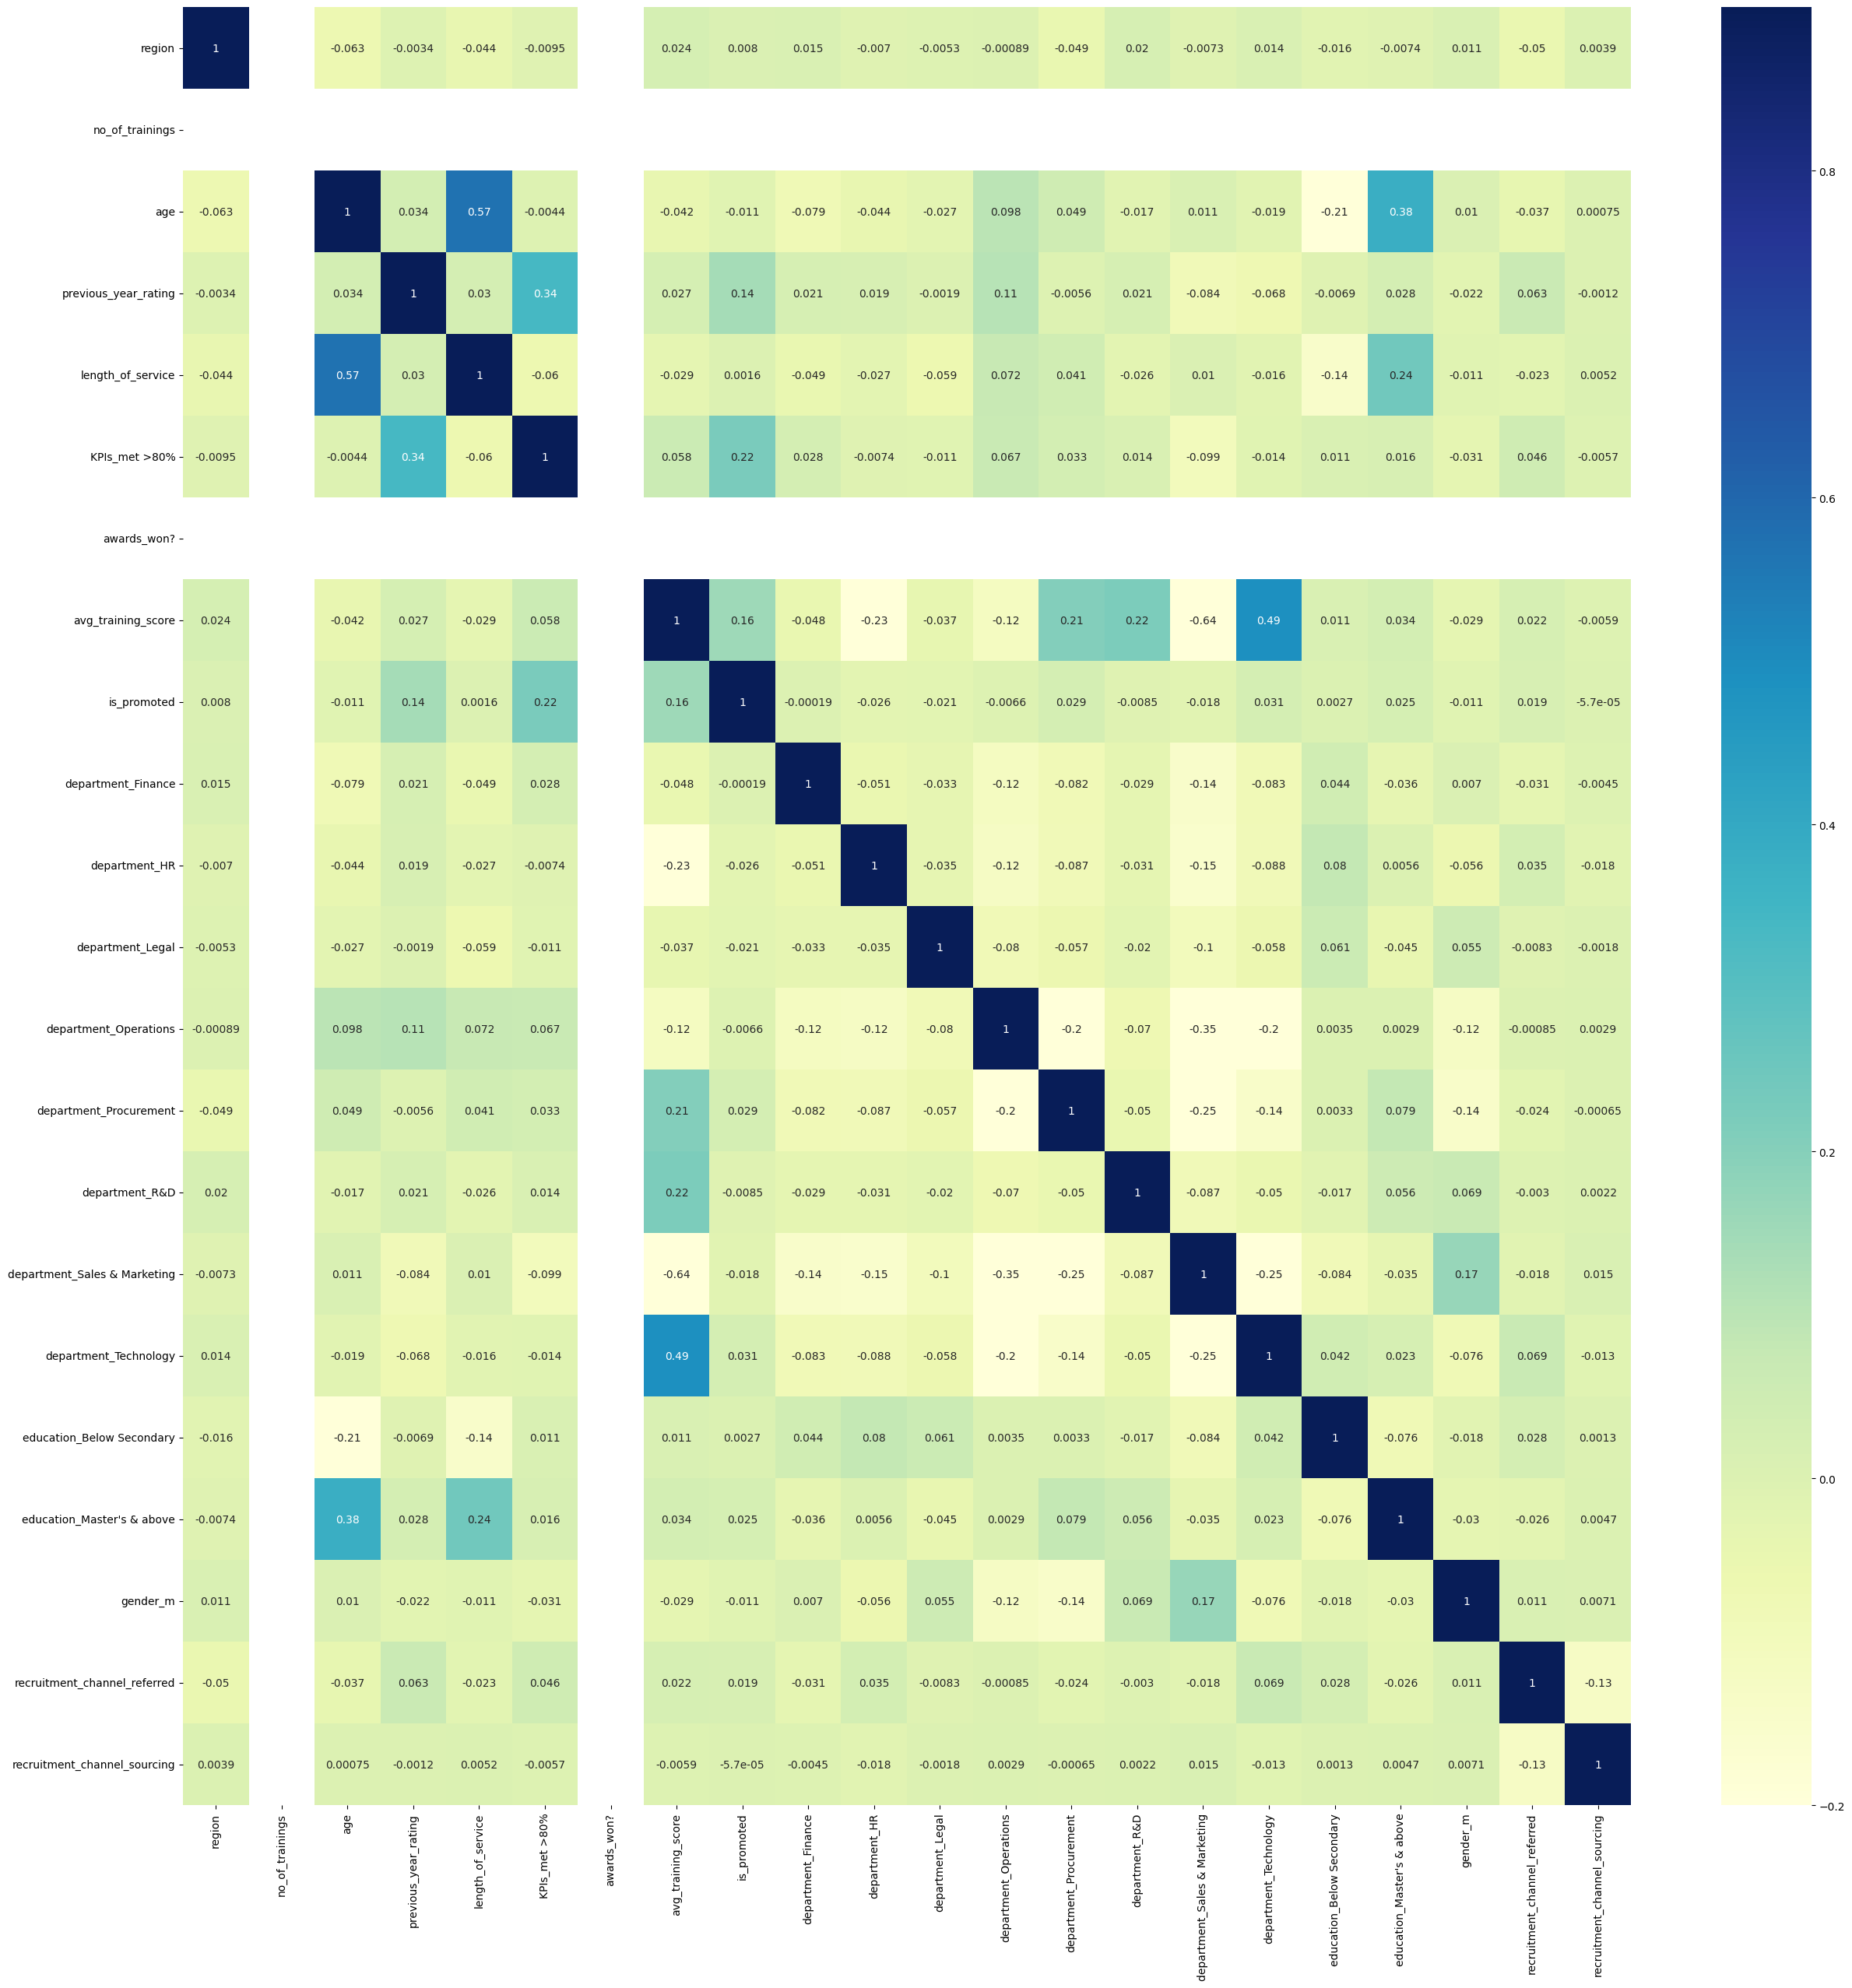

In [85]:
plt.figure(figsize=(30,30))
corr_matrix=train.corr()
sns.heatmap(corr_matrix,vmin=-0.2,vmax=0.9,annot=True,cmap='YlGnBu')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

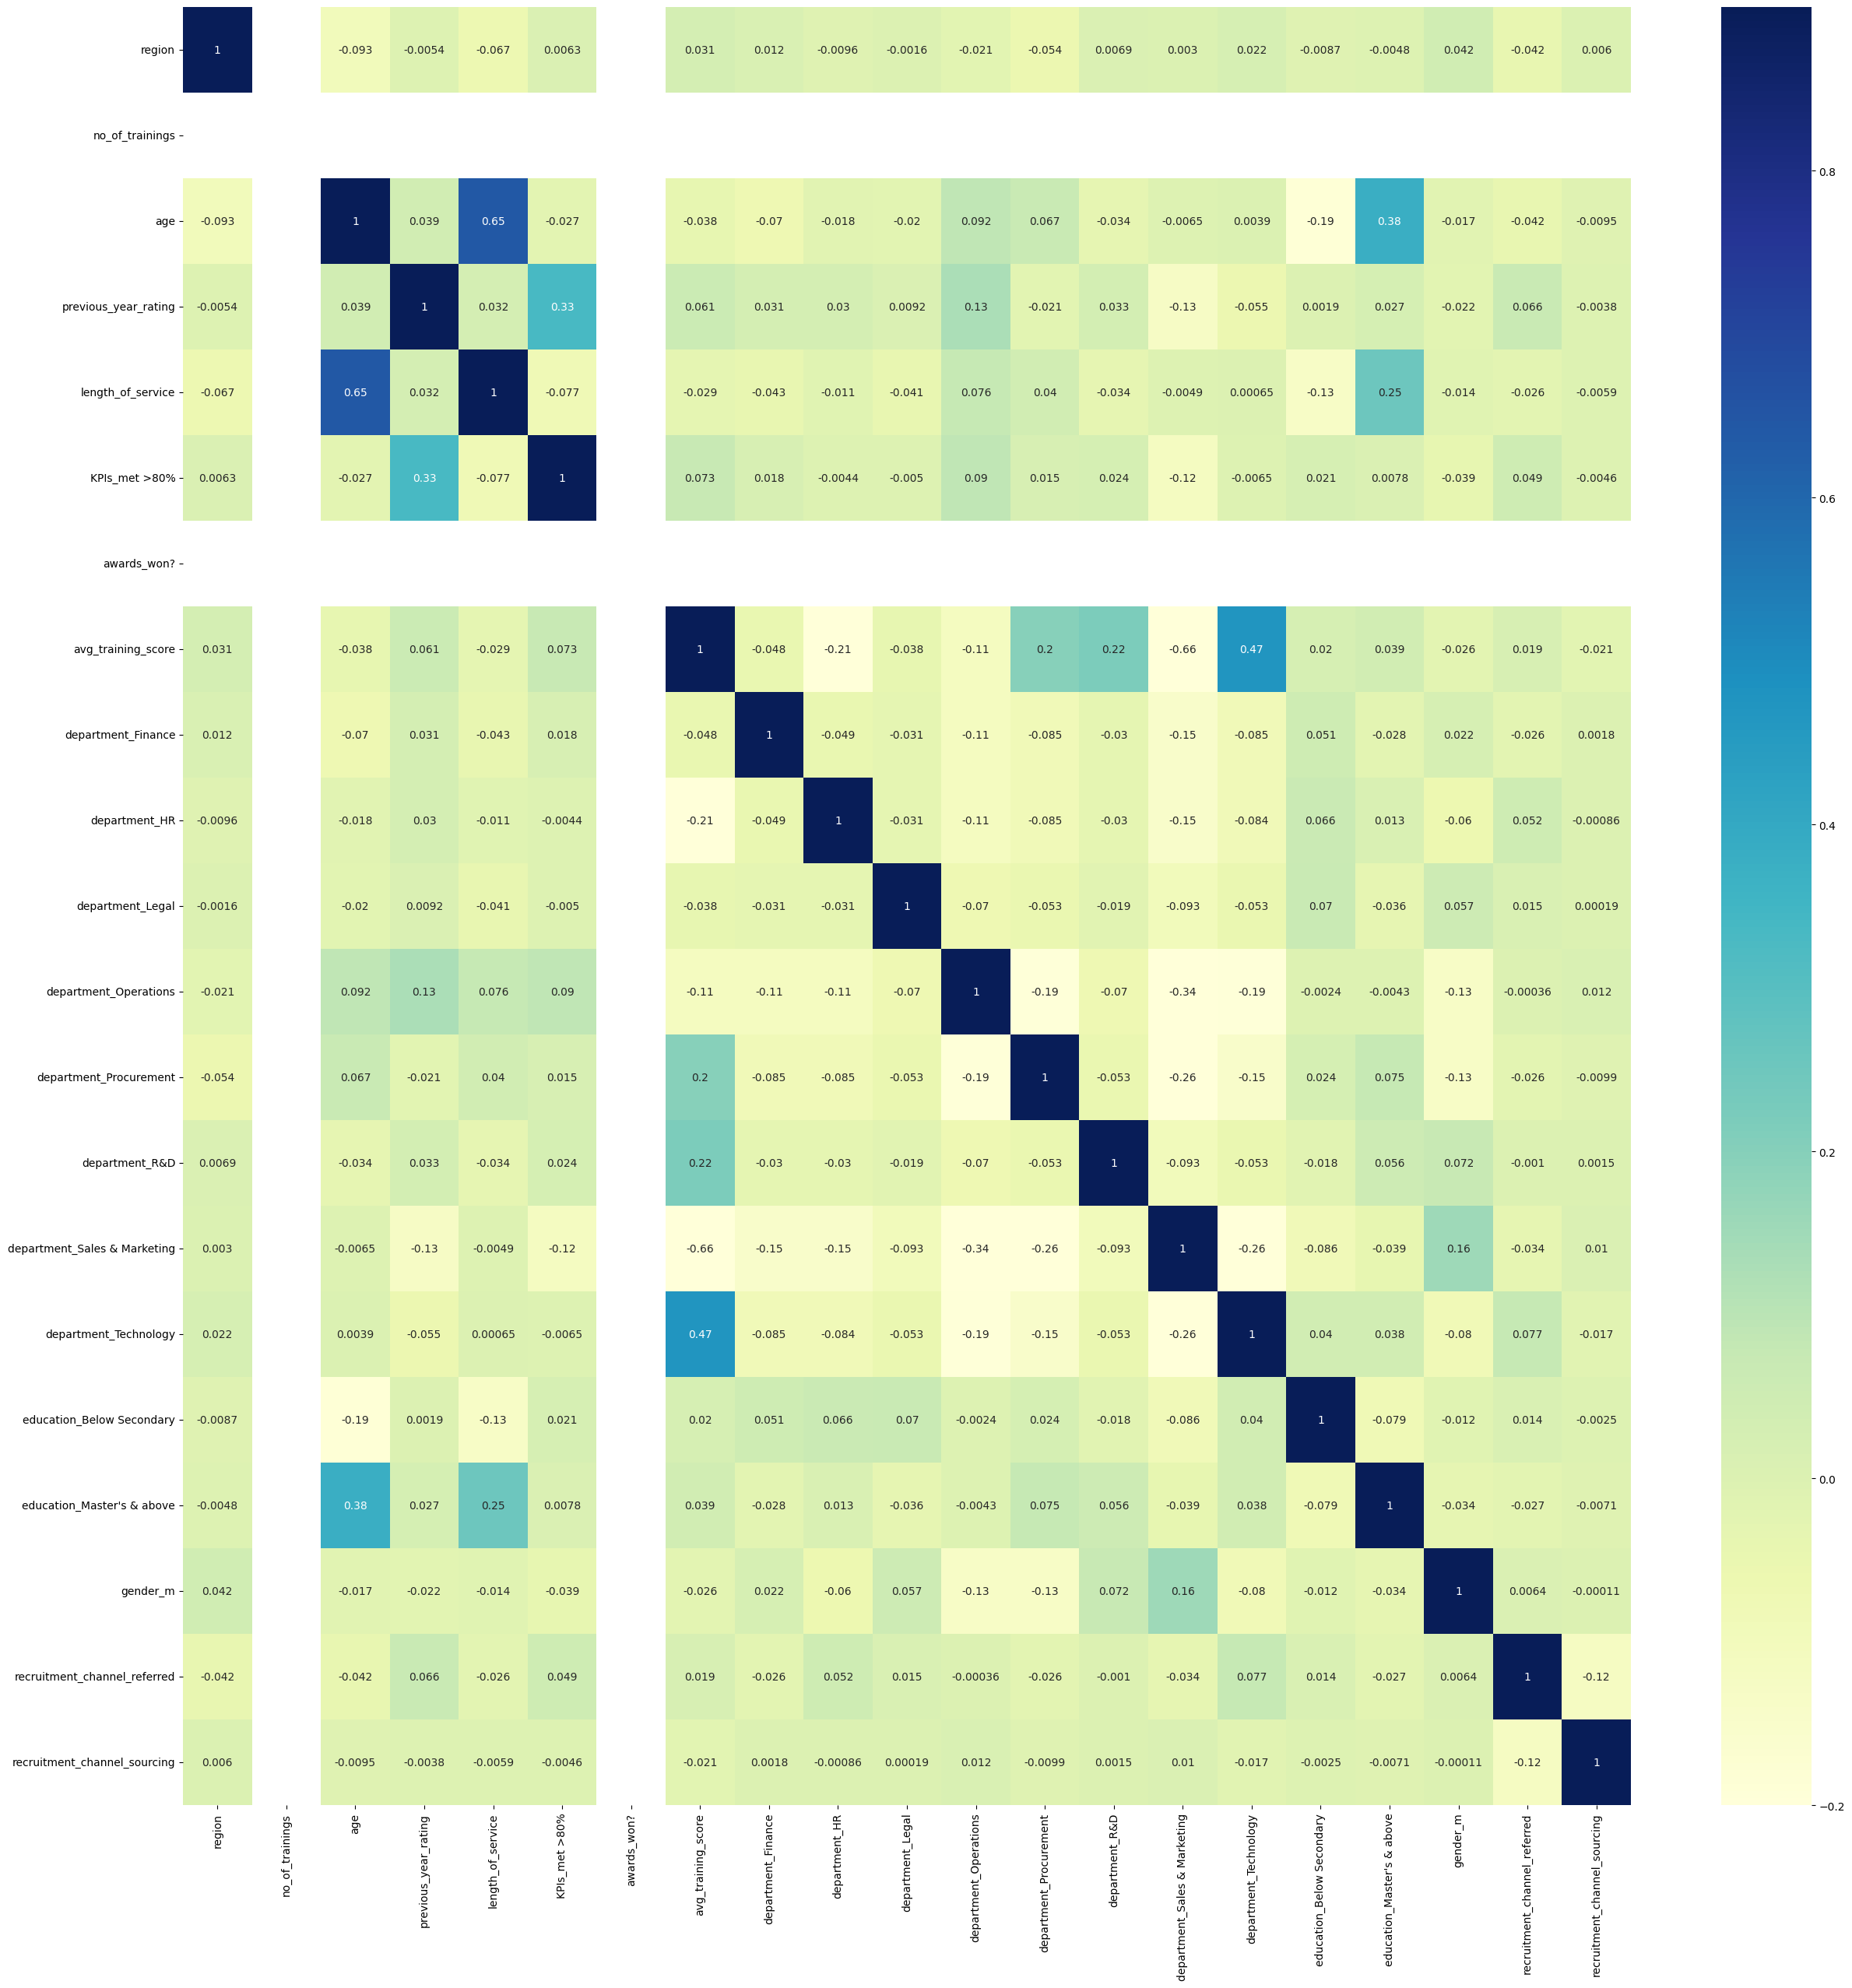

In [86]:
plt.figure(figsize=(30,30))
corr_matrix=test.corr()
sns.heatmap(corr_matrix,vmin=-0.2,vmax=0.9,annot=True,cmap='YlGnBu')
plt.show

**Scaling**

In [87]:
train.columns

Index(['region', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'education_Below Secondary', 'education_Master's & above', 'gender_m',
       'recruitment_channel_referred', 'recruitment_channel_sourcing'],
      dtype='object')

In [88]:
train.head()

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,31,1,35.0,5.0,8.0,1,0,49,0.0,0,...,0,0,0,1,0,0,1,0,0,1
1,14,1,30.0,5.0,4.0,0,0,60,0.0,0,...,1,0,0,0,0,0,0,1,0,0
2,10,1,34.0,3.0,7.0,0,0,50,0.0,0,...,0,0,0,1,0,0,0,1,0,1
4,18,1,45.0,3.0,2.0,0,0,73,0.0,0,...,0,0,0,0,1,0,0,1,0,0
6,12,1,31.0,3.0,5.0,0,0,59,0.0,0,...,1,0,0,0,0,0,0,0,0,0


In [89]:
from sklearn.preprocessing import StandardScaler

# List of numeric columns to scale
numeric_cols = ['region', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score']  # excluding target & one-hot columns

# Initialize scaler
scaler = StandardScaler()

# Fit on train numeric columns and transform
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])

# Transform test numeric columns using same scaler
test[numeric_cols] = scaler.transform(test[numeric_cols])

In [90]:
train.head()

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1.713921,0.0,0.220594,1.372998,0.866870,1.332893,0.0,-1.058566,0.0,0,...,0,0,0,1,0,0,1,0,0,1
1,-0.178241,0.0,-0.604584,1.372998,-0.401703,-0.750248,0.0,-0.220787,0.0,0,...,1,0,0,0,0,0,0,1,0,0
2,-0.623456,0.0,0.055559,-0.271619,0.549727,-0.750248,0.0,-0.982404,0.0,0,...,0,0,0,1,0,0,0,1,0,1
4,0.266973,0.0,1.870950,-0.271619,-1.035989,-0.750248,0.0,0.769316,0.0,0,...,0,0,0,0,1,0,0,1,0,0
6,-0.400849,0.0,-0.439548,-0.271619,-0.084559,-0.750248,0.0,-0.296948,0.0,0,...,1,0,0,0,0,0,0,0,0,0


In [91]:
#checking imbalance

Class distribution:
 is_promoted
0.0    36719
1.0     3228
Name: count, dtype: int64


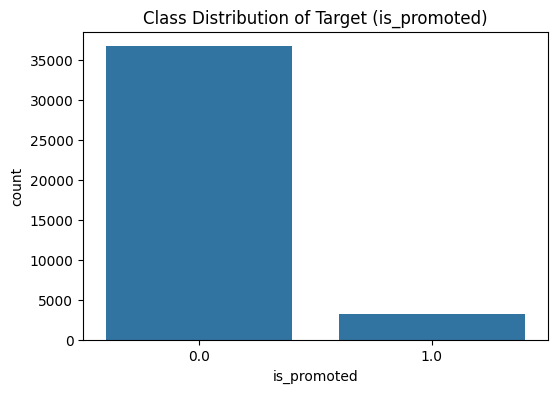

Imbalance ratio (majority/minority): 11.38


In [92]:
# Count the target classes
class_counts = train['is_promoted'].value_counts()
print("Class distribution:\n", class_counts)

# Visualize
plt.figure(figsize=(6,4))
sns.countplot(x='is_promoted', data=train)
plt.title('Class Distribution of Target (is_promoted)')
plt.show()

# Optional: imbalance ratio
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"Imbalance ratio (majority/minority): {imbalance_ratio:.2f}")


In [93]:
# As it is highly imbalanced, doing smote

In [94]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = train.drop(columns=['is_promoted'])
y = train['is_promoted']

# Split into train/validation (optional)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Class distribution after SMOTE:")
print(y_train_res.value_counts())

Class distribution after SMOTE:
is_promoted
0.0    29375
1.0    29375
Name: count, dtype: int64


**MODEL SELECTION BASED ON METRICS**

**DECISION TREE**

In [97]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train_res,y_train_res)

DecisionTreeClassifier()

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Training Metrics
y_train_pred = dt_clf.predict(X_train_res)
print("Training Metrics:")
print("Accuracy:", accuracy_score(y_train_res, y_train_pred))
print("Precision:", precision_score(y_train_res, y_train_pred))
print("Recall:", recall_score(y_train_res, y_train_pred))
print("F1 Score:", f1_score(y_train_res, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train_res, y_train_pred))

# Test Metrics
y_val_pred = dt_clf.predict(X_val)
print("Test Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

Training Metrics:
Accuracy: 0.9998808510638297
Precision: 0.9999659516513449
Recall: 0.9997957446808511
F1 Score: 0.9998808409226317

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29375
         1.0       1.00      1.00      1.00     29375

    accuracy                           1.00     58750
   macro avg       1.00      1.00      1.00     58750
weighted avg       1.00      1.00      1.00     58750

Test Metrics:
Accuracy: 0.8814768460575719
Precision: 0.32147093712930014
Recall: 0.4195046439628483
F1 Score: 0.36400268636668903

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      7344
         1.0       0.32      0.42      0.36       646

    accuracy                           0.88      7990
   macro avg       0.63      0.67      0.65      7990
weighted avg       0.90      0.88      0.89      7990



**SVM**

In [99]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(X_train_res,y_train_res)

SVC(kernel='linear')

In [100]:
# Training Metrics
y_train_pred = svmclf.predict(X_train_res)
print("Training Metrics:")
print("Accuracy:", accuracy_score(y_train_res, y_train_pred))
print("Precision:", precision_score(y_train_res, y_train_pred))
print("Recall:", recall_score(y_train_res, y_train_pred))
print("F1 Score:", f1_score(y_train_res, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train_res, y_train_pred))

# Test Metrics
y_val_pred = svmclf.predict(X_val)
print("Test Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

Training Metrics:
Accuracy: 0.8003744680851064
Precision: 0.7470253926481705
Recall: 0.9083574468085106
F1 Score: 0.8198297846191661

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.69      0.78     29375
         1.0       0.75      0.91      0.82     29375

    accuracy                           0.80     58750
   macro avg       0.82      0.80      0.80     58750
weighted avg       0.82      0.80      0.80     58750

Test Metrics:
Accuracy: 0.7006257822277847
Precision: 0.1960306406685237
Recall: 0.871517027863777
F1 Score: 0.32006822057987494

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.69      0.81      7344
         1.0       0.20      0.87      0.32       646

    accuracy                           0.70      7990
   macro avg       0.59      0.78      0.56      7990
weighted avg       0.92      0.70      0.77      7990



**GBM**

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
svmclf=SVC(kernel='linear')
# Initialize the Gradient Boosting classifier
gbm_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

gbm_clf.fit(X_train_res,y_train_res)

GradientBoostingClassifier(random_state=42)

In [102]:
# Training Metrics
y_train_pred = gbm_clf.predict(X_train_res)
print("Training Metrics:")
print("Accuracy:", accuracy_score(y_train_res, y_train_pred))
print("Precision:", precision_score(y_train_res, y_train_pred))
print("Recall:", recall_score(y_train_res, y_train_pred))
print("F1 Score:", f1_score(y_train_res, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train_res, y_train_pred))

# Test Metrics
y_val_pred = gbm_clf.predict(X_val)
print("Test Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

Training Metrics:
Accuracy: 0.8811744680851064
Precision: 0.8464847134546355
Recall: 0.9312340425531915
F1 Score: 0.8868392472159634

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.83      0.87     29375
         1.0       0.85      0.93      0.89     29375

    accuracy                           0.88     58750
   macro avg       0.89      0.88      0.88     58750
weighted avg       0.89      0.88      0.88     58750

Test Metrics:
Accuracy: 0.8067584480600751
Precision: 0.23803967327887982
Recall: 0.631578947368421
F1 Score: 0.34576271186440677

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.82      0.89      7344
         1.0       0.24      0.63      0.35       646

    accuracy                           0.81      7990
   macro avg       0.60      0.73      0.62      7990
weighted avg       0.90      0.81      0.84      7990



**K-Nearest Neighbors (KNN)**

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

#  Initialize KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train
knn_clf.fit(X_train_res, y_train_res)

#  Training Metrics
y_train_pred = knn_clf.predict(X_train_res)
print("KNN Training Metrics:")
print("Accuracy:", accuracy_score(y_train_res, y_train_pred))
print("Precision:", precision_score(y_train_res, y_train_pred))
print("Recall:", recall_score(y_train_res, y_train_pred))
print("F1 Score:", f1_score(y_train_res, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train_res, y_train_pred))

# Validation Metrics
y_val_pred = knn_clf.predict(X_val)
print("KNN Validation Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

KNN Training Metrics:
Accuracy: 0.931131914893617
Precision: 0.8838076188744431
Recall: 0.9927829787234043
F1 Score: 0.935131148592317

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.87      0.93     29375
         1.0       0.88      0.99      0.94     29375

    accuracy                           0.93     58750
   macro avg       0.94      0.93      0.93     58750
weighted avg       0.94      0.93      0.93     58750

KNN Validation Metrics:
Accuracy: 0.802377972465582
Precision: 0.21914509331727874
Recall: 0.5634674922600619
F1 Score: 0.3155613350671868

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.82      0.88      7344
         1.0       0.22      0.56      0.32       646

    accuracy                           0.80      7990
   macro avg       0.59      0.69      0.60      7990
weighted avg       0.90      0.80      0.84      7990



**AdaBoost**

In [105]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost
adaboost_clf = AdaBoostClassifier(
    n_estimators=100,  # Number of weak learners
    learning_rate=1.0,
    random_state=42
)

#  Train
adaboost_clf.fit(X_train_res, y_train_res)

# Training Metrics
y_train_pred = adaboost_clf.predict(X_train_res)
print("AdaBoost Training Metrics:")
print("Accuracy:", accuracy_score(y_train_res, y_train_pred))
print("Precision:", precision_score(y_train_res, y_train_pred))
print("Recall:", recall_score(y_train_res, y_train_pred))
print("F1 Score:", f1_score(y_train_res, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train_res, y_train_pred))

#  Validation Metrics
y_val_pred = adaboost_clf.predict(X_val)
print("AdaBoost Validation Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

AdaBoost Training Metrics:
Accuracy: 0.782536170212766
Precision: 0.7765670298910327
Recall: 0.793327659574468
F1 Score: 0.784857874174862

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.77      0.78     29375
         1.0       0.78      0.79      0.78     29375

    accuracy                           0.78     58750
   macro avg       0.78      0.78      0.78     58750
weighted avg       0.78      0.78      0.78     58750

AdaBoost Validation Metrics:
Accuracy: 0.7571964956195244
Precision: 0.20184331797235022
Recall: 0.6780185758513931
F1 Score: 0.31107954545454547

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.76      0.85      7344
         1.0       0.20      0.68      0.31       646

    accuracy                           0.76      7990
   macro avg       0.58      0.72      0.58      7990
weighted avg       0.90      0.76      0.81      7990



**XGBoost**

In [106]:
from xgboost import XGBClassifier

# Initialize XGBoost
xgb_clf = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train
xgb_clf.fit(X_train_res, y_train_res)

#Training Metrics
y_train_pred = xgb_clf.predict(X_train_res)
print("XGBoost Training Metrics:")
print("Accuracy:", accuracy_score(y_train_res, y_train_pred))
print("Precision:", precision_score(y_train_res, y_train_pred))
print("Recall:", recall_score(y_train_res, y_train_pred))
print("F1 Score:", f1_score(y_train_res, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train_res, y_train_pred))

# Validation Metrics
y_val_pred = xgb_clf.predict(X_val)
print("XGBoost Validation Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:35:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Training Metrics:
Accuracy: 0.9267234042553192
Precision: 0.9248864483763812
Recall: 0.9288851063829787
F1 Score: 0.9268814647485436

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.92      0.93     29375
         1.0       0.92      0.93      0.93     29375

    accuracy                           0.93     58750
   macro avg       0.93      0.93      0.93     58750
weighted avg       0.93      0.93      0.93     58750

XGBoost Validation Metrics:
Accuracy: 0.8821026282853567
Precision: 0.33555555555555555
Recall: 0.4674922600619195
F1 Score: 0.3906856403622251

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      7344
         1.0       0.34      0.47      0.39       646

    accuracy                           0.88      7990
   macro avg       0.64      0.69      0.66      7990
weighted avg       0.90      0.88      0.89      7990



**Hyperparameter tuning**

In [107]:
# As XGBoost got highest F1 Score, I am doing hyperparameter tuning for that. (i tried to do hyperparameter tuning for svc, it's raking 1.30 hr. After that also, not getting output. So I am doing it only for the model with highest F1 Score)

In [108]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from scipy.stats import randint, uniform


# --- Hyperparameter distributions ---
param_dist_xgb = {
    'n_estimators': randint(100, 500),          # Number of trees
    'learning_rate': uniform(0.01, 0.2),        # 0.01 to 0.21
    'max_depth': randint(3, 10),                # 3 to 9
    'min_child_weight': randint(1, 10),         # 1 to 9
    'subsample': uniform(0.6, 0.4),             # 0.6 to 1.0
    'colsample_bytree': uniform(0.6, 0.4),      # 0.6 to 1.0
    'gamma': uniform(0, 0.5)                    # 0 to 0.5
}

# --- F1-score scorer ---
f1_scorer = make_scorer(f1_score)

# --- RandomizedSearchCV ---
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist_xgb,
    n_iter=50,           # Number of random combinations to try
    scoring=f1_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# --- Fit on training data (SMOTE applied) ---
random_search_xgb.fit(X_train_res, y_train_res)

# --- Best hyperparameters ---
print("Best Hyperparameters (XGBoost):", random_search_xgb.best_params_)
print("Best F1 Score (CV, XGBoost):", random_search_xgb.best_score_)

# --- Use best estimator for predictions ---
best_xgb = random_search_xgb.best_estimator_

# --- Evaluate on validation set ---
y_val_pred_xgb = best_xgb.predict(X_val)
print("Validation F1 Score (XGBoost):", f1_score(y_val, y_val_pred_xgb))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:52:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Hyperparameters (XGBoost): {'colsample_bytree': np.float64(0.7881202537784153), 'gamma': np.float64(0.4917115704474215), 'learning_rate': np.float64(0.08976488848891061), 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': np.float64(0.7283120259886944)}
Best F1 Score (CV, XGBoost): 0.9513140145370587
Validation F1 Score (XGBoost): 0.4349680170575693


In [109]:
# --- Predict on Test Data ---
y_test_pred = best_xgb.predict(test)  # test should have same columns as X_train_res


In [110]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [112]:
# --- Add predictions to test DataFrame ---
test_pred_df = test_backup.copy()
test_pred_df['is_promoted'] = y_test_pred

In [113]:
test_pred_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,0
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,0
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,0
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,0
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,0
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,0


In [115]:
test_pred_df['is_promoted'].value_counts()

,count
is_promoted,
0,22590
1,900


In [117]:
# Replace the existing column
sampling['is_promoted'] = y_test_pred

In [122]:
sampling

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [123]:
sampling.to_csv('predicted_promotions.csv', index=False)

print("File saved successfully as 'predicted_promotions.csv'")

File saved successfully as 'predicted_promotions.csv'


In [124]:
from google.colab import files

# Download the CSV file
files.download('predicted_promotions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>